In [2]:
# # Imports Pandas, numpy, sklearn and matplotlib for data manipulation and visualization
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# loading and reading the data
data = pd.read_csv('features.csv')

## No of observations and variables
data.shape

(41949, 54)

In [5]:
# Display top of dataframe
data.head()


,page_popularity,page_checkins,page_mentions,page_category,derived_1,derived_2,derived_3,derived_4,derived_5,derived_6,...,friday_post,saturday_post,sunday_time,monday_time,tuesday_time,wednesday_time,thursday_time,friday_time,saturday_time,output
0,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# # Data Types and Missing Values

# See the column data types and non-missing values
data.info() ## No missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41949 entries, 0 to 41948
Data columns (total 54 columns):
page_popularity          41949 non-null int64
page_checkins            41949 non-null int64
page_mentions            41949 non-null int64
page_category            41949 non-null int64
derived_1                41949 non-null int64
derived_2                41949 non-null int64
derived_3                41949 non-null float64
derived_4                41949 non-null float64
derived_5                41949 non-null float64
derived_6                41949 non-null int64
derived_7                41949 non-null int64
derived_8                41949 non-null float64
derived_9                41949 non-null float64
derived_10               41949 non-null float64
derived_11               41949 non-null int64
derived_12               41949 non-null int64
derived_13               41949 non-null float64
derived_14               41949 non-null float64
derived_15               41949 non-null float64

In [7]:
# Statistics for each column
data.describe()

,page_popularity,page_checkins,page_mentions,page_category,derived_1,derived_2,derived_3,derived_4,derived_5,derived_6,...,friday_post,saturday_post,sunday_time,monday_time,tuesday_time,wednesday_time,thursday_time,friday_time,saturday_time,output
count,4.194900e+04,4.194900e+04,4.194900e+04,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,...,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000
mean,1.373487e+06,4.692329e+03,5.016193e+04,24.198098,1.761329,449.385921,56.703058,36.156678,68.822745,0.319722,...,0.148609,0.139097,0.146249,0.134020,0.134354,0.145057,0.149205,0.144819,0.146297,7.782069
std,6.853878e+06,2.130941e+04,1.380645e+05,19.970488,23.429401,507.979665,89.651968,72.093357,84.366383,13.107268,...,0.355707,0.346052,0.353360,0.340678,0.341036,0.352163,0.356295,0.351922,0.353408,38.727624
min,3.600000e+01,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.036800e+04,0.000000e+00,7.450000e+02,9.000000,0.000000,45.000000,5.703704,2.000000,8.365189,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.099140e+05,0.000000e+00,8.153000e+03,18.000000,0.000000,241.000000,23.842105,12.000000,35.853805,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.294733e+06,9.900000e+01,5.320700e+04,32.000000,0.000000,717.000000,72.980769,42.000000,106.366011,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,1.100558e+06,6.784263e+06,106.000000,2341.000000,2858.000000,2341.000000,2341.000000,1101.000000,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2136.000000


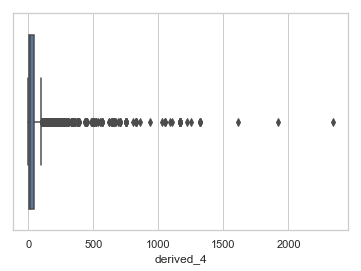

In [8]:
## Boxplot to identify outliers
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["derived_4"])

In [9]:
## Identifying specific outliers using Z score > 3 as threshold
from scipy import stats
z = np.abs(stats.zscore(data["derived_4"]))
print(np.where(z > 3))


(array([  134,   135,   136,   137,   138,   139,   140,   141,   142,
         143,   144,   145,   146,   147,   148,   149,   150,   151,
         152,   153,   154,   155,   156,   157,   158,   159,   160,
         161,   162,   163,   164,   165,   166,   167,   168,   169,
         170,   171,   172,   173,   174,   175,   176,   177,   178,
         179,   180,   181,   182,   183,   184,   185,   186,   187,
         188,   189,   190,   191,   192,   193,   194,   195,   196,
         197,   198,   199,   200,   201,   202,   203,   204,   205,
         206,   207,   208,   209,   210,   211,  1372,  1373,  1374,
        1375,  1376,  1377,  1433,  1434,  1435,  1436,  1437,  1438,
        1439,  1440,  1441,  1442,  1443,  1444,  1445,  1446,  1447,
        1448,  1449,  1450,  1451,  1452,  1453,  1454,  1455,  1456,
        1457,  1458,  1459,  1460,  1461,  1462,  1463,  1464,  1465,
        1466,  1467,  1468,  1469,  1470,  1471,  1472,  1942,  1943,
        1944,  1945

In [10]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = data.corr()['output'].sort_values()

#Print the most negative correlations
print(correlations_data.head(20), '\n')

#Print the most positive correlations
print(correlations_data.tail(16)) 



simulate_time    -0.215863
derived_21       -0.194839
page_category    -0.072044
H_hours          -0.026527
saturday_post    -0.008057
sunday_time      -0.006499
tuesday_time     -0.004790
friday_post      -0.004121
thursday_post    -0.004045
tuesday_post     -0.003765
saturday_time    -0.003411
monday_post      -0.003348
friday_time      -0.001921
post_length      -0.001781
monday_time       0.001375
thursday_time     0.004373
sunday_post       0.009419
wednesday_time    0.010748
wednesday_post    0.014073
derived_11        0.016874
Name: output, dtype: float64 

derived_20               0.299377
derived_5                0.303257
derived_25               0.305466
derived_13               0.309832
derived_4                0.323718
derived_19               0.324048
derived_9                0.325067
comments_counts          0.328437
derived_3                0.338255
derived_18               0.338323
comments_24_post         0.342350
derived_8                0.352976
comments_diff        

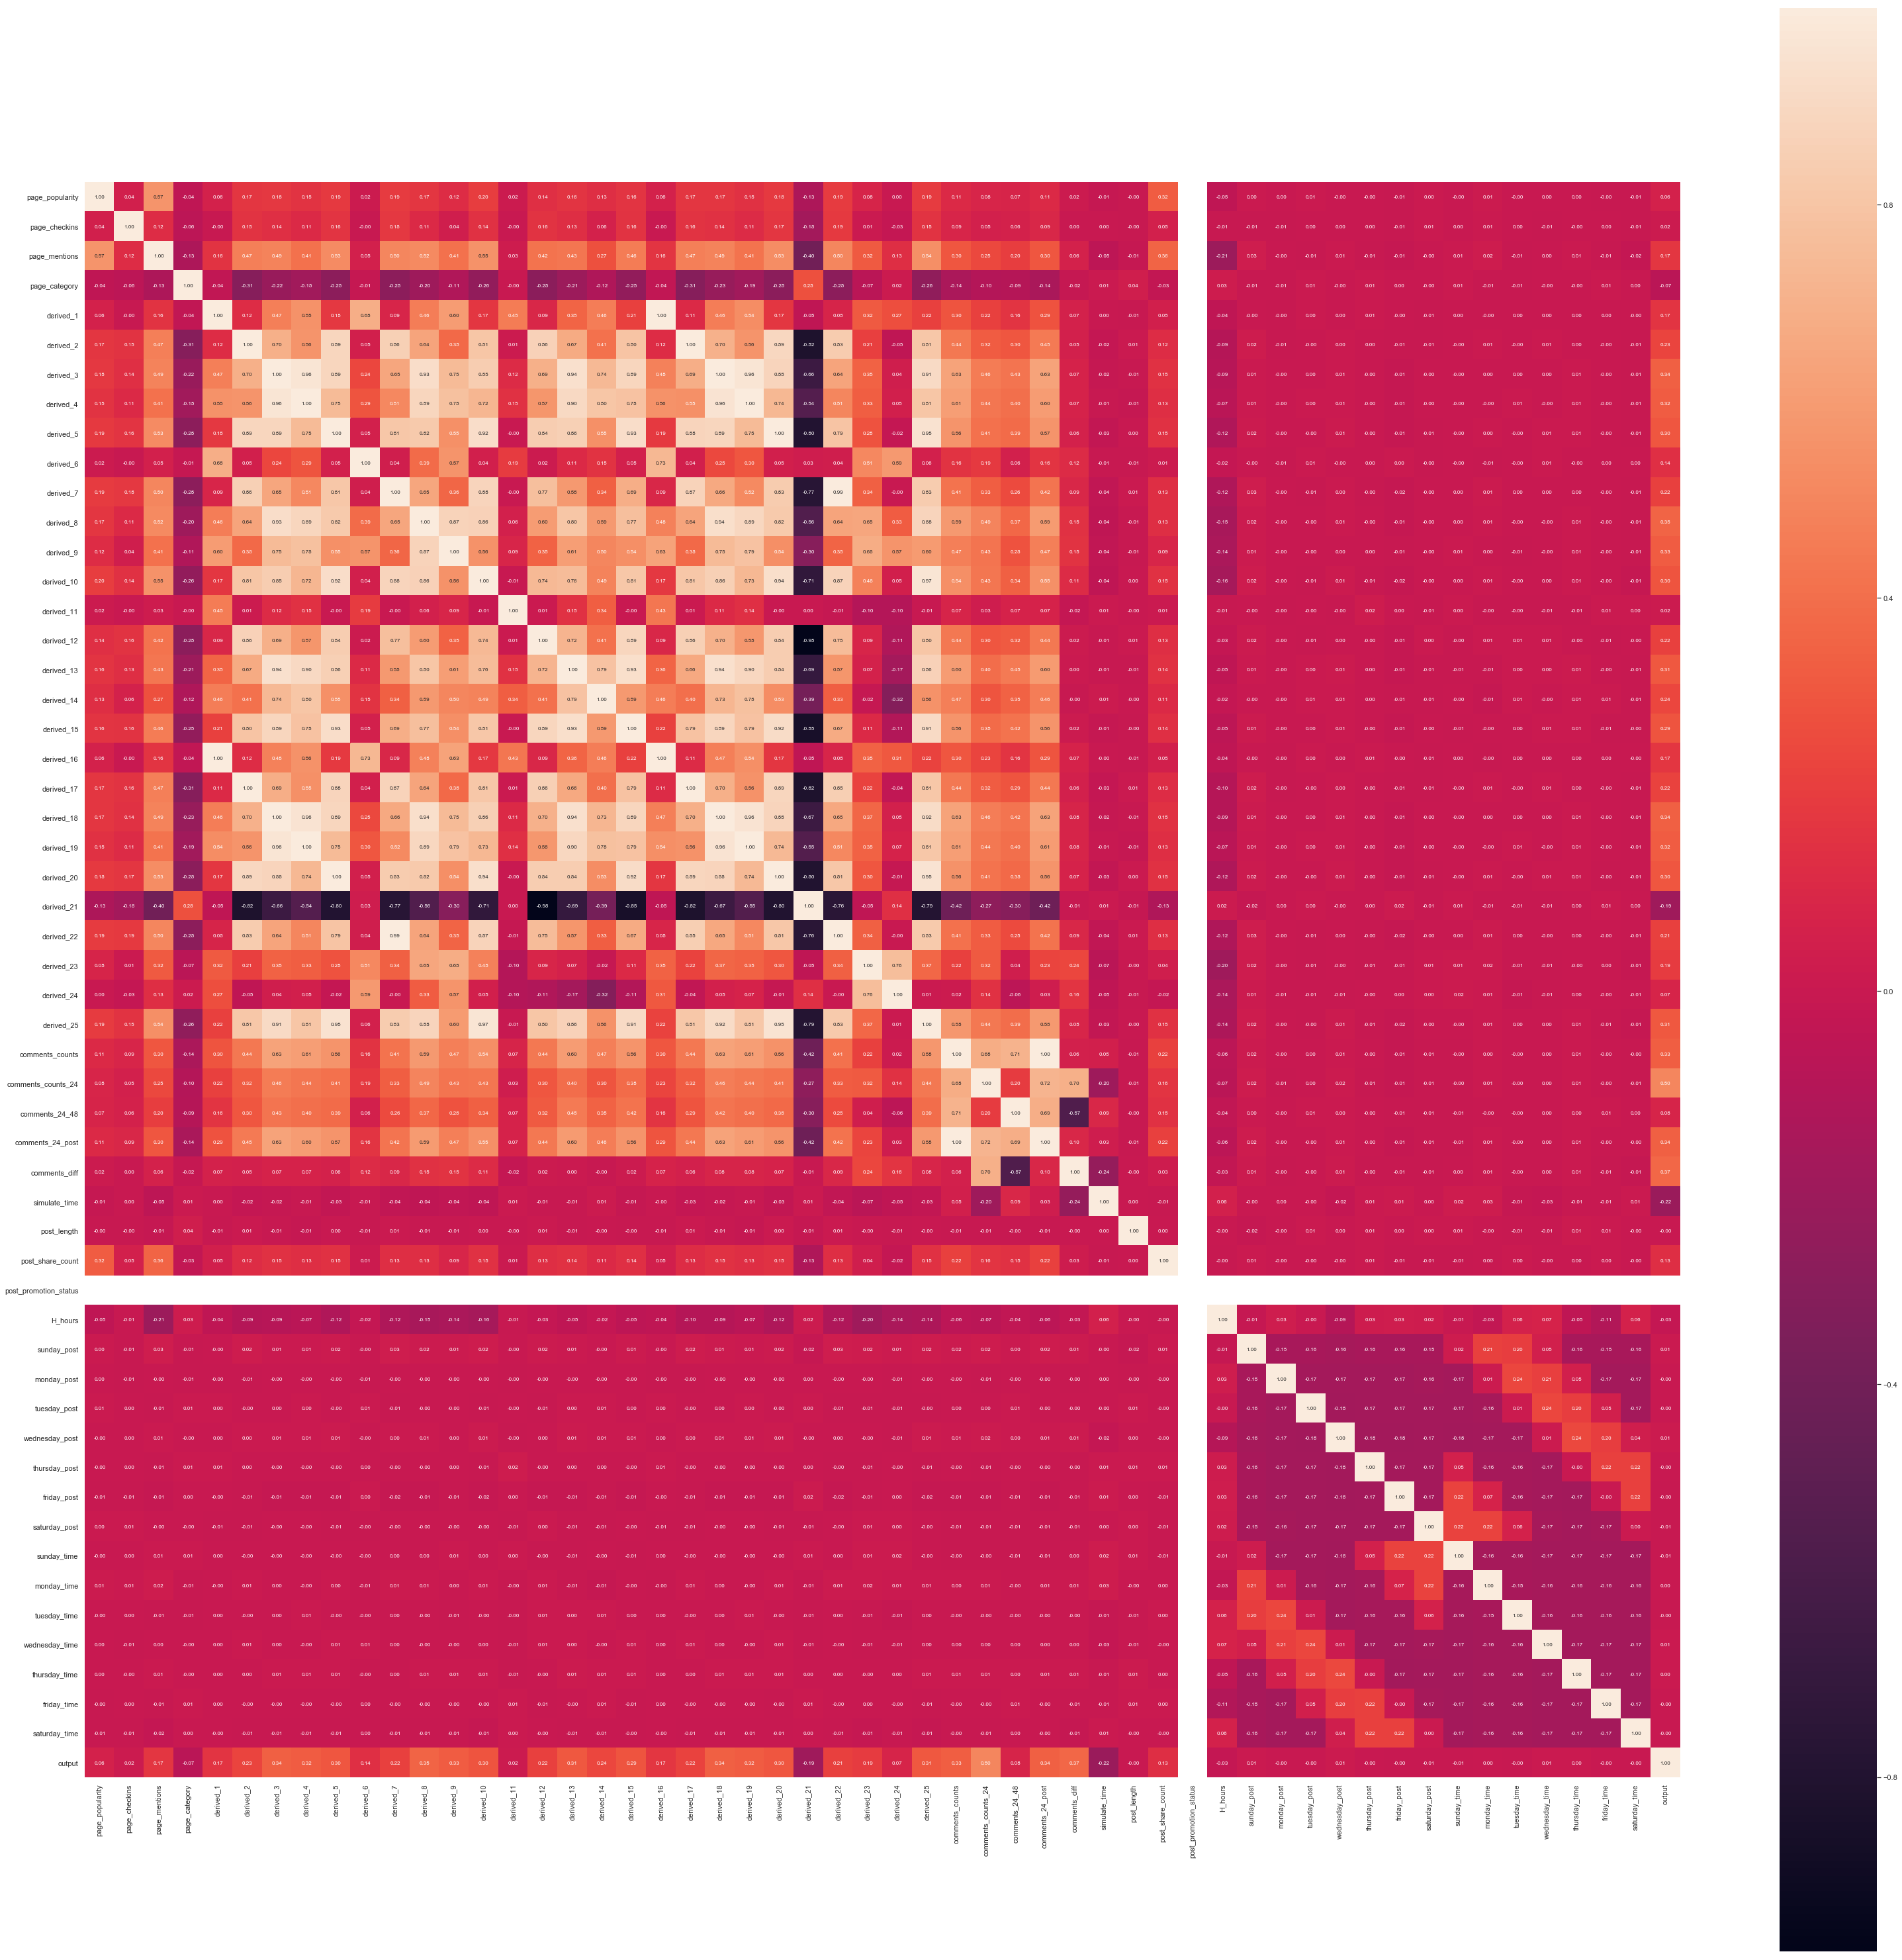

In [11]:
correlation = data.corr()
plt.figure(figsize=(54,54))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

In [12]:
# Based on the correlation of features with target variables, I select the significant features and stored in another
# data frame
newdata = data[['page_mentions', 'derived_5', 'derived_25', 'derived_13', 'derived_18', 'derived_8', 'comments_24_post', 'comments_diff', 'comments_counts_24', 'post_share_count', 'H_hours', 'output']]
newdata.shape

(41949, 12)

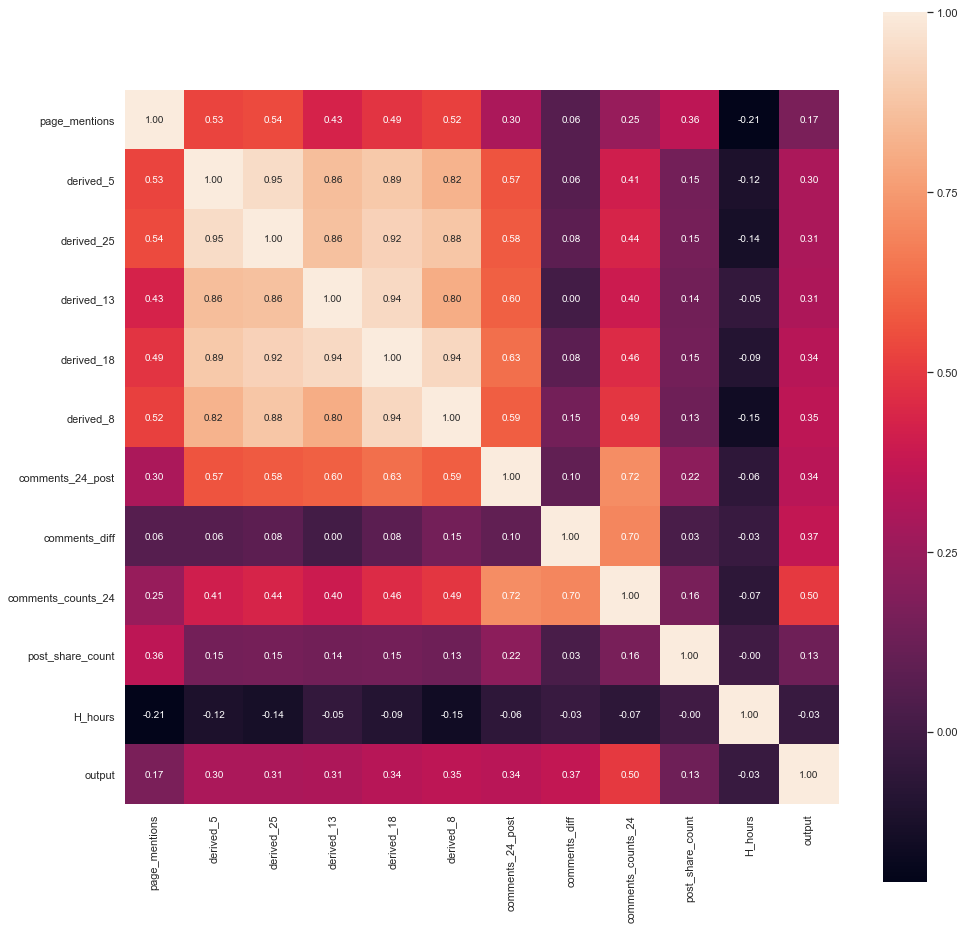

In [13]:
## Correlation between variables for new dataset

correlation2 = newdata.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation2, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=correlation2.columns.values,
            yticklabels=correlation2.columns.values)

In [14]:
### Split Into Training and Testing Sets
from sklearn.model_selection import train_test_split

## Separate out the features and targets
features = newdata.drop(columns='output')
targets = pd.DataFrame(newdata['output'])

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29364, 11)
(12585, 11)
(29364, 1)
(12585, 1)


In [15]:
def normalize(data):
    for i in data.columns:
        data[i] = (data[i]-data[i].mean())/(data[i].max() - data[i].min())
    return data
Xtrain = pd.DataFrame(normalize(X_train))
Xtest = pd.DataFrame(normalize(X_test))
print(Xtrain.shape)
print(Xtest.shape)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(29364, 11)
(12585, 11)


In [16]:
## appending a column of ones to Xtrain and Xtest
one_column = np.ones((Xtrain.shape[0],1))
Xtrain = np.concatenate((one_column, Xtrain), axis = 1)
one_column2 = np.ones((Xtest.shape[0],1))
Xtest = np.concatenate((one_column2, Xtest), axis = 1)

In [17]:
Xtest.shape

(12585, 12)

In [19]:
Xtrain.shape

(29364, 12)

In [20]:
# Convert y to one-dimensional array (vector)
ytrain = np.array(y_train).reshape((-1, ))
ytest = np.array(y_test).reshape((-1, ))

In [21]:
ytest.shape

(12585,)

In [22]:
train.shape

(29364,)

In [23]:
## Defined a gradient descent function with batch update with x, y, learning rate and threshold as inputs
## this function returns beta values, cost function values and graph of cost function w.r.t iterations
def gradient_descent(x,y,lr,threshold):
    m,n = x.shape
    beta = np.array([0]*n)
    cost_history = [1000]
    thresholdvalue = 10
    trigger=0
    while(True):
        if thresholdvalue<=threshold and thresholdvalue>0:
            trigger+=1
        if trigger==10:
            break
        else:
            hypo = np.dot(beta,np.transpose(x))
            loss = hypo-y
            cost = np.sum(loss**2)/(2*m)
            gradient = np.dot(loss,x)/m
            beta = beta - lr*gradient
            thresholdvalue = ((cost_history[-1] - cost))
            cost_history.append(cost)
            if (len(cost_history)%1000 == 0):
                print("We are at the iteration ===> %d" %len(cost_history))
                print(cost_history[-1])
                print(thresholdvalue)
    graph = plt.plot(cost_history)
    return(graph,beta,cost_history)

We are at the iteration ===> 1000
547.1611780102157
0.022065544866222808
We are at the iteration ===> 2000
537.5091184731646
0.00370764016213343
We are at the iteration ===> 3000
535.3653476960717
0.0012534100054608643
We are at the iteration ===> 4000
534.4221911004831
0.0007459020841906749
We are at the iteration ===> 5000
533.7675102623989
0.0005866652986696863
We are at the iteration ===> 6000
533.2248620909178
0.0005049003536896635
We are at the iteration ===> 7000
532.7501278369268
0.0004470844140769259
We are at the iteration ===> 8000
532.3271175534165
0.0004003761766853131
We are at the iteration ===> 9000
531.9471168179159
0.0003606364988399946
We are at the iteration ===> 10000
531.6041843738363
0.00032601215411887097
We are at the iteration ===> 11000
531.2937784797541
0.00029543873290549527
We are at the iteration ===> 12000
531.0122236299783
0.0002682081043303697
We are at the iteration ===> 13000
530.7564458059161
0.00024380826368997077
We are at the iteration ===> 14000

We are at the iteration ===> 20000
529.5034833215223
0.00012737686211039545
We are at the iteration ===> 21000
529.3817620720894
0.00011625016941252397
We are at the iteration ===> 22000
529.2706634180316
0.0001061144359937316
We are at the iteration ===> 23000
529.169243402815
9.68774720604415e-05
We are at the iteration ===> 24000
529.0766453328888
8.845669435686432e-05
We are at the iteration ===> 25000
528.9920908342425
8.07778475291343e-05
We are at the iteration ===> 26000
528.914872062193
7.37739648002389e-05
We are at the iteration ===> 1000
547.1611780102157
0.022065544866222808
We are at the iteration ===> 2000
537.5091184731646
0.00370764016213343
We are at the iteration ===> 3000
535.3653476960717
0.0012534100054608643
We are at the iteration ===> 4000
534.4221911004831
0.0007459020841906749
We are at the iteration ===> 5000
533.7675102623989
0.0005866652986696863
We are at the iteration ===> 6000
533.2248620909178
0.0005049003536896635
We are at the iteration ===> 7000
532

We are at the iteration ===> 14000
530.5238175783664
0.00022184919828305283
We are at the iteration ===> 15000
530.3120581032905
0.00020202261362101126
We are at the iteration ===> 16000
530.1191644604088
0.0001840777400730076
We are at the iteration ===> 17000
529.943362413225
0.00016780586645381845
We are at the iteration ===> 18000
529.7830698432845
0.00015303002987820946
We are at the iteration ===> 19000
529.6368687645814
0.00013959792045170616
We are at the iteration ===> 20000
529.5034833215223
0.00012737686211039545
We are at the iteration ===> 21000
529.3817620720894
0.00011625016941252397
We are at the iteration ===> 22000
529.2706634180316
0.0001061144359937316
We are at the iteration ===> 23000
529.169243402815
9.68774720604415e-05
We are at the iteration ===> 24000
529.0766453328888
8.845669435686432e-05
We are at the iteration ===> 25000
528.9920908342425
8.07778475291343e-05
We are at the iteration ===> 26000
528.914872062193
7.37739648002389e-05
We are at the iteration 

We are at the iteration ===> 1000
549.3813121677654
0.024646886110417654
We are at the iteration ===> 2000
538.2798081634756
0.0044072484757862185
We are at the iteration ===> 3000
535.7480272127344
0.0014352032637816592
We are at the iteration ===> 4000
534.7122491935738
0.0007805781610841223
We are at the iteration ===> 5000
534.0460213839507
0.0005840095394660239
We are at the iteration ===> 6000
533.5106663274328
0.0004953042996476142
We are at the iteration ===> 7000
533.0454105019065
0.00043827821241393394
We are at the iteration ===> 8000
532.6300022343514
0.0003940715513408577
We are at the iteration ===> 9000
532.2549629080343
0.0003569945698700394
We are at the iteration ===> 10000
531.9144280358267
0.00032480819425018126
We are at the iteration ===> 11000
531.6041324775798
0.00029636813962952147
We are at the iteration ===> 12000
531.3207076957074
0.00027096784708646737
We are at the iteration ===> 13000
531.061372136844
0.000248117922410529
We are at the iteration ===> 1400

We are at the iteration ===> 15000
530.6058466796549
0.000208698256074058
We are at the iteration ===> 16000
530.4058272797655
0.00019162109265380423
We are at the iteration ===> 17000
530.2221230409767
0.00017603826211143314
We are at the iteration ===> 18000
530.053319697976
0.00016179409738015238
We are at the iteration ===> 19000
529.8981467437503
0.00014875575413952902
We are at the iteration ===> 20000
529.7554572226409
0.00013680826418749348
We are at the iteration ===> 21000
529.6242117286449
0.00012585097852024774
We are at the iteration ===> 22000
529.5034654606092
0.00011579495026126096
We are at the iteration ===> 23000
529.3923575476696
0.00010656097140326892
We are at the iteration ===> 24000
529.2901020957172
9.80780681629767e-05
We are at the iteration ===> 25000
529.195980564725
9.028232568653038e-05
We are at the iteration ===> 26000
529.1093351951168
8.311595217946888e-05
We are at the iteration ===> 27000
529.0295632762587
7.652652186607156e-05
We are at the iterati

We are at the iteration ===> 2000
538.2798081634756
0.0044072484757862185
We are at the iteration ===> 3000
535.7480272127344
0.0014352032637816592
We are at the iteration ===> 4000
534.7122491935738
0.0007805781610841223
We are at the iteration ===> 5000
534.0460213839507
0.0005840095394660239
We are at the iteration ===> 6000
533.5106663274328
0.0004953042996476142
We are at the iteration ===> 7000
533.0454105019065
0.00043827821241393394
We are at the iteration ===> 8000
532.6300022343514
0.0003940715513408577
We are at the iteration ===> 9000
532.2549629080343
0.0003569945698700394
We are at the iteration ===> 10000
531.9144280358267
0.00032480819425018126
We are at the iteration ===> 11000
531.6041324775798
0.00029636813962952147
We are at the iteration ===> 12000
531.3207076957074
0.00027096784708646737
We are at the iteration ===> 13000
531.061372136844
0.000248117922410529
We are at the iteration ===> 14000
530.8237653913288
0.00022745528781342728
We are at the iteration ===> 1

We are at the iteration ===> 31000
528.7688154279747
5.504526882305072e-05
We are at the iteration ===> 32000
528.7159733237113
5.070343183888326e-05
We are at the iteration ===> 33000
528.667297371172
4.670776468174154e-05
We are at the iteration ===> 34000
528.6224555693587
4.303035916564113e-05
We are at the iteration ===> 35000
528.58114265533
3.964560949043516e-05
We are at the iteration ===> 36000
528.5430779050888
3.653000999292999e-05
We are at the iteration ===> 37000
528.5080031256792
3.366197347531852e-05
We are at the iteration ===> 38000
528.4756808193711
3.1021669087749615e-05
We are at the iteration ===> 39000
528.4458925033108
2.8590873171197018e-05
We are at the iteration ===> 40000
528.4184371700627
2.6352835220677662e-05
We are at the iteration ===> 41000
528.3931298761701
2.429215703614318e-05
We are at the iteration ===> 42000
528.3698004472949
2.2394680058823724e-05
We are at the iteration ===> 43000
528.3482922897053
2.0647384076255548e-05
We are at the iteration

We are at the iteration ===> 16000
530.7343034409937
0.00019775964642576582
We are at the iteration ===> 17000
530.54400308754
0.00018306330139239435
We are at the iteration ===> 18000
530.3677975410022
0.00016954787497525103
We are at the iteration ===> 19000
530.2045655800447
0.00015709721810708288
We are at the iteration ===> 20000
530.0532934692168
0.0001456118042142407
We are at the iteration ===> 21000
529.9130601951019
0.00013500520594789123
We are at the iteration ===> 22000
529.7830257179585
0.00012520152631623205
We are at the iteration ===> 23000
529.662421444208
0.0001161334863581942
We are at the iteration ===> 24000
529.5505423651011
0.00010774097802368487
We are at the iteration ===> 25000
529.4467404673003
9.996994924676983e-05
We are at the iteration ===> 26000
529.3504191307568
9.277153128550708e-05
We are at the iteration ===> 27000
529.2610283054785
8.610134466380259e-05
We are at the iteration ===> 1000
552.122173103807
0.02750699918135524
We are at the iteration =

We are at the iteration ===> 5000
534.3551624856242
0.0005926718847604207
We are at the iteration ===> 6000
533.8210859579751
0.0004879570765297103
We are at the iteration ===> 7000
533.3649204460745
0.00042856048139583436
We are at the iteration ===> 8000
532.9586495147707
0.0003858033916230852
We are at the iteration ===> 9000
532.5907264618124
0.0003510763257281724
We are at the iteration ===> 10000
532.2548992476678
0.0003212875772078405
We are at the iteration ===> 11000
531.9470008028671
0.0002950527987195528
We are at the iteration ===> 12000
531.6638910079533
0.0002716088546321771
We are at the iteration ===> 13000
531.403040084181
0.00025046533551176253
We are at the iteration ===> 14000
531.1623304943683
0.00023127460190153215
We are at the iteration ===> 15000
530.9399462530348
0.00021377461803240294
We are at the iteration ===> 16000
530.7343034409937
0.00019775964642576582
We are at the iteration ===> 17000
530.54400308754
0.00018306330139239435
We are at the iteration ===

We are at the iteration ===> 37000
528.6534506283818
4.1014407202055736e-05
We are at the iteration ===> 38000
528.6139144987532
3.8097062883934996e-05
We are at the iteration ===> 39000
528.5771894042881
3.53894914724151e-05
We are at the iteration ===> 40000
528.5430732887278
3.2876469617804105e-05
We are at the iteration ===> 41000
528.5113787492827
3.0543897651114094e-05
We are at the iteration ===> 42000
528.4819319578226
2.837871124938829e-05
We are at the iteration ===> 43000
528.4545716646319
2.6368804014964553e-05
We are at the iteration ===> 44000
528.4291482777277
2.4502954488525575e-05
We are at the iteration ===> 45000
528.4055230114768
2.2770759983359312e-05
We are at the iteration ===> 46000
528.3835670988851
2.1162575762900815e-05
We are at the iteration ===> 1000
552.122173103807
0.02750699918135524
We are at the iteration ===> 2000
539.2994074210849
0.005304568669885157
We are at the iteration ===> 3000
536.2421042226318
0.00170681011150009
We are at the iteration ===

We are at the iteration ===> 21000
530.2575698951324
0.0001432287430134238
We are at the iteration ===> 22000
530.1190826871434
0.00013386673094828438
We are at the iteration ===> 23000
529.9896312003475
0.0001251477511914345
We are at the iteration ===> 24000
529.8685981423678
0.00011702134338520409
We are at the iteration ===> 25000
529.755413937541
0.0001094423706717862
We are at the iteration ===> 26000
529.6495518420684
0.00010237017829695105
We are at the iteration ===> 1000
555.5378977908722
0.030611526191023586
We are at the iteration ===> 2000
540.6799398750654
0.006457890340129779
We are at the iteration ===> 3000
536.9121031909821
0.0021062858936602424
We are at the iteration ===> 4000
535.4828737167184
0.0009790988151507918
We are at the iteration ===> 5000
534.712000697517
0.0006243824758485061
We are at the iteration ===> 6000
534.1651322523196
0.00048798431600971526
We are at the iteration ===> 7000
533.7143242083695
0.0004199165736054056
We are at the iteration ===> 800

We are at the iteration ===> 18000
530.7342663089988
0.00017578270853846334
We are at the iteration ===> 19000
530.5643955229426
0.00016411717024311656
We are at the iteration ===> 20000
530.4057636751619
0.00015329065604419156
We are at the iteration ===> 21000
530.2575698951324
0.0001432287430134238
We are at the iteration ===> 22000
530.1190826871434
0.00013386673094828438
We are at the iteration ===> 23000
529.9896312003475
0.0001251477511914345
We are at the iteration ===> 24000
529.8685981423678
0.00011702134338520409
We are at the iteration ===> 25000
529.755413937541
0.0001094423706717862
We are at the iteration ===> 26000
529.6495518420684
0.00010237017829695105
We are at the iteration ===> 27000
529.5505238052704
9.576793365795311e-05
We are at the iteration ===> 28000
529.4578769204602
8.960209959241183e-05
We are at the iteration ===> 29000
529.3711903478957
8.38420129412043e-05
We are at the iteration ===> 30000
529.2900726205504
7.845953689411544e-05
We are at the iterati

We are at the iteration ===> 18000
530.7342663089988
0.00017578270853846334
We are at the iteration ===> 19000
530.5643955229426
0.00016411717024311656
We are at the iteration ===> 20000
530.4057636751619
0.00015329065604419156
We are at the iteration ===> 21000
530.2575698951324
0.0001432287430134238
We are at the iteration ===> 22000
530.1190826871434
0.00013386673094828438
We are at the iteration ===> 23000
529.9896312003475
0.0001251477511914345
We are at the iteration ===> 24000
529.8685981423678
0.00011702134338520409
We are at the iteration ===> 25000
529.755413937541
0.0001094423706717862
We are at the iteration ===> 26000
529.6495518420684
0.00010237017829695105
We are at the iteration ===> 27000
529.5505238052704
9.576793365795311e-05
We are at the iteration ===> 28000
529.4578769204602
8.960209959241183e-05
We are at the iteration ===> 29000
529.3711903478957
8.38420129412043e-05
We are at the iteration ===> 30000
529.2900726205504
7.845953689411544e-05
We are at the iterati

We are at the iteration ===> 34000
529.014362580584
6.0216708789084805e-05
We are at the iteration ===> 35000
528.9560920512664
5.6371068353655573e-05
We are at the iteration ===> 36000
528.9015412928701
5.277408615711465e-05
We are at the iteration ===> 37000
528.850469951324
4.940936730690737e-05
We are at the iteration ===> 38000
528.8026534908677
4.6261653551482596e-05
We are at the iteration ===> 39000
528.7578821037736
4.331673198976205e-05
We are at the iteration ===> 40000
528.7159597050029
4.0561356172474916e-05
We are at the iteration ===> 41000
528.6767030032258
3.798317288783437e-05
We are at the iteration ===> 42000
528.6399406408605
3.557065645054536e-05
We are at the iteration ===> 43000
528.6055123967751
3.331304947096214e-05
We are at the iteration ===> 44000
528.5732684461211
3.1200307489598345e-05
We are at the iteration ===> 45000
528.5430686724288
2.9223049295978853e-05
We are at the iteration ===> 46000
528.5147820276684
2.7372511340217898e-05
We are at the iterat

We are at the iteration ===> 1000
559.8362459993293
0.033865230536434865
We are at the iteration ===> 2000
542.5965410440783
0.007944142508108598
We are at the iteration ===> 3000
537.8669148008049
0.002688190358526299
We are at the iteration ===> 4000
536.0611969369113
0.0012027143175146193
We are at the iteration ===> 5000
535.1513737495686
0.0007007453752976289
We are at the iteration ===> 6000
534.5617136772903
0.0005064934741767502
We are at the iteration ===> 7000
534.1047220909164
0.00041749885974695644
We are at the iteration ===> 8000
533.7142306545421
0.0003674155633461851
We are at the iteration ===> 9000
533.3647489547151
0.00033330626456518075
We are at the iteration ===> 10000
533.0451733413315
0.00030677077950258536
We are at the iteration ===> 11000
532.7498353000362
0.00028447994645830477
We are at the iteration ===> 12000
532.4753163343171
0.00026496514294649387
We are at the iteration ===> 13000
532.2192472909188
0.0002474886039181001
We are at the iteration ===> 140

We are at the iteration ===> 11000
532.7498353000362
0.00028447994645830477
We are at the iteration ===> 12000
532.4753163343171
0.00026496514294649387
We are at the iteration ===> 13000
532.2192472909188
0.0002474886039181001
We are at the iteration ===> 14000
531.9798192204037
0.0002316264697128645
We are at the iteration ===> 15000
531.75556352544
0.00021710493842874712
We are at the iteration ===> 16000
531.5452414079747
0.00020373059760459
We are at the iteration ===> 17000
531.3477816503449
0.00019135792842917
We are at the iteration ===> 18000
531.1622419477475
0.00017987256444484956
We are at the iteration ===> 19000
530.9877829158671
0.00016918180040192965
We are at the iteration ===> 20000
530.8236495752086
0.0001592087404560516
We are at the iteration ===> 21000
530.6691575977364
0.00014988843804530916
We are at the iteration ===> 22000
530.5236827735707
0.00014116521992946218
We are at the iteration ===> 23000
530.386652753814
0.00013299075624217949
We are at the iteration 

We are at the iteration ===> 39000
529.006855987621
5.2255648597565596e-05
We are at the iteration ===> 40000
528.9560820258041
4.932380420541449e-05
We are at the iteration ===> 41000
528.9081557142454
4.655852148971462e-05
We are at the iteration ===> 42000
528.8629153727852
4.395014889269078e-05
We are at the iteration ===> 43000
528.8202086749482
4.14896227312056e-05
We are at the iteration ===> 44000
528.7798920802836
3.916842740636639e-05
We are at the iteration ===> 45000
528.7418303058445
3.697855731843447e-05
We are at the iteration ===> 46000
528.7058958332743
3.491248298814753e-05
We are at the iteration ===> 47000
528.6719684484253
3.296311990652612e-05
We are at the iteration ===> 48000
528.6399348108107
3.112380045422469e-05
We are at the iteration ===> 1000
559.8362459993293
0.033865230536434865
We are at the iteration ===> 2000
542.5965410440783
0.007944142508108598
We are at the iteration ===> 3000
537.8669148008049
0.002688190358526299
We are at the iteration ===> 400

We are at the iteration ===> 46000
528.7058958332743
3.491248298814753e-05
We are at the iteration ===> 47000
528.6719684484253
3.296311990652612e-05
We are at the iteration ===> 48000
528.6399348108107
3.112380045422469e-05
We are at the iteration ===> 49000
528.6096880505072
2.938824638931692e-05
We are at the iteration ===> 50000
528.581127390389
2.775054599624127e-05
We are at the iteration ===> 51000
528.554157791805
2.6205130552625633e-05
We are at the iteration ===> 52000
528.5286896219956
2.47467529561618e-05
We are at the iteration ===> 53000
528.5046383417179
2.3370469534711447e-05
We are at the iteration ===> 54000
528.4819242116865
2.2071621287977905e-05
We are at the iteration ===> 55000
528.4604720165634
2.0845816152359475e-05
We are at the iteration ===> 56000
528.440210805336
1.9688914790094714e-05
We are at the iteration ===> 57000
528.4210736470251
1.8597013877297286e-05
We are at the iteration ===> 58000
528.4029974007377
1.7566433939464332e-05
We are at the iteratio

We are at the iteration ===> 2000
545.3325479195241
0.009858564915703028
We are at the iteration ===> 3000
539.2970761116251
0.0035333423431893607
We are at the iteration ===> 4000
536.9114220026629
0.0015790585377999378
We are at the iteration ===> 5000
535.7472443621162
0.0008606428795019383
We are at the iteration ===> 6000
535.0540139777529
0.0005669106412824476
We are at the iteration ===> 7000
534.561595578718
0.0004341130478451305
We are at the iteration ===> 8000
534.1649221153117
0.00036595892117929907
We are at the iteration ===> 9000
533.8207976928732
0.0003252728785128056
We are at the iteration ===> 10000
533.5103106324318
0.00029714814104409015
We are at the iteration ===> 11000
533.2244482518269
0.0002753630810730101
We are at the iteration ===> 12000
532.9584176425018
0.0002571824568349257
We are at the iteration ===> 13000
532.7093347617724
0.0002413178463029908
We are at the iteration ===> 14000
532.4752485203567
0.0002271075211410789
We are at the iteration ===> 1500

We are at the iteration ===> 4000
536.9114220026629
0.0015790585377999378
We are at the iteration ===> 5000
535.7472443621162
0.0008606428795019383
We are at the iteration ===> 6000
535.0540139777529
0.0005669106412824476
We are at the iteration ===> 7000
534.561595578718
0.0004341130478451305
We are at the iteration ===> 8000
534.1649221153117
0.00036595892117929907
We are at the iteration ===> 9000
533.8207976928732
0.0003252728785128056
We are at the iteration ===> 10000
533.5103106324318
0.00029714814104409015
We are at the iteration ===> 11000
533.2244482518269
0.0002753630810730101
We are at the iteration ===> 12000
532.9584176425018
0.0002571824568349257
We are at the iteration ===> 13000
532.7093347617724
0.0002413178463029908
We are at the iteration ===> 14000
532.4752485203567
0.0002271075211410789
We are at the iteration ===> 15000
532.2547082742881
0.00021417664777345635
We are at the iteration ===> 16000
532.0465599982969
0.00020229104347890825
We are at the iteration ===>

We are at the iteration ===> 24000
530.7341920470271
0.00013183156568175036
We are at the iteration ===> 25000
530.6057065536818
0.0001252086599379254
We are at the iteration ===> 26000
530.4836604191635
0.00011894810552348645
We are at the iteration ===> 27000
530.3677039610039
0.0001130250569758573
We are at the iteration ===> 28000
530.2575110164255
0.00010741724304352829
We are at the iteration ===> 29000
530.1527765773882
0.0001021045637799034
We are at the iteration ===> 30000
530.053214785657
9.706876960535737e-05
We are at the iteration ===> 31000
529.9585572172329
9.229320107806416e-05
We are at the iteration ===> 32000
529.8685514015468
8.776257755016559e-05
We are at the iteration ===> 33000
529.7829595327636
8.346282288584916e-05
We are at the iteration ===> 34000
529.7015573395558
7.93809209653773e-05
We are at the iteration ===> 35000
529.6241330866187
7.550479665496823e-05
We are at the iteration ===> 36000
529.5504866865282
7.182321326126839e-05
We are at the iteration 

We are at the iteration ===> 20000
531.3205197995513
0.0001625666607196763
We are at the iteration ===> 21000
531.162197675674
0.00015417319184507505
We are at the iteration ===> 22000
531.0120149210557
0.00014627987707171997
We are at the iteration ===> 23000
530.8694929190315
0.0001388447507224555
We are at the iteration ===> 24000
530.7341920470271
0.00013183156568175036
We are at the iteration ===> 25000
530.6057065536818
0.0001252086599379254
We are at the iteration ===> 26000
530.4836604191635
0.00011894810552348645
We are at the iteration ===> 27000
530.3677039610039
0.0001130250569758573
We are at the iteration ===> 28000
530.2575110164255
0.00010741724304352829
We are at the iteration ===> 29000
530.1527765773882
0.0001021045637799034
We are at the iteration ===> 30000
530.053214785657
9.706876960535737e-05
We are at the iteration ===> 31000
529.9585572172329
9.229320107806416e-05
We are at the iteration ===> 32000
529.8685514015468
8.776257755016559e-05
We are at the iteratio

We are at the iteration ===> 26000
531.0611593013952
0.0001240458124129873
We are at the iteration ===> 27000
530.9397841181676
0.0001187536911402276
We are at the iteration ===> 28000
530.8235723679784
0.00011371578591479192
We are at the iteration ===> 29000
530.7122782399508
0.00010891561373682634
We are at the iteration ===> 30000
530.6056715237615
0.00010433840554924245
We are at the iteration ===> 31000
530.5035360341084
9.997083964208286e-05
We are at the iteration ===> 1000
572.311798941733
0.039839139483888175
We are at the iteration ===> 2000
549.3631872486526
0.012296004833387997
We are at the iteration ===> 3000
541.5535449717703
0.0047652225580350205
We are at the iteration ===> 4000
538.2769428358616
0.0022007764565614707
We are at the iteration ===> 5000
536.6626971260449
0.0011728198536502532
We are at the iteration ===> 6000
535.7470486858024
0.0007171026593368879
We are at the iteration ===> 7000
535.1510782824116
0.0005004380965374366
We are at the iteration ===> 800

We are at the iteration ===> 36000
530.0531885587097
8.088903962288896e-05
We are at the iteration ===> 37000
529.9739788140631
7.755824117339216e-05
We are at the iteration ===> 38000
529.8980276235727
7.4370594688844e-05
We are at the iteration ===> 39000
529.8251953397527
7.13191762997667e-05
We are at the iteration ===> 1000
572.311798941733
0.039839139483888175
We are at the iteration ===> 2000
549.3631872486526
0.012296004833387997
We are at the iteration ===> 3000
541.5535449717703
0.0047652225580350205
We are at the iteration ===> 4000
538.2769428358616
0.0022007764565614707
We are at the iteration ===> 5000
536.6626971260449
0.0011728198536502532
We are at the iteration ===> 6000
535.7470486858024
0.0007171026593368879
We are at the iteration ===> 7000
535.1510782824116
0.0005004380965374366
We are at the iteration ===> 8000
534.7116279834632
0.00039016402831748564
We are at the iteration ===> 9000
534.3547191741038
0.00032920095588906406
We are at the iteration ===> 10000
534

We are at the iteration ===> 17000
532.4375181376164
0.00018738810558716068
We are at the iteration ===> 18000
532.2546446190678
0.00017847635388079652
We are at the iteration ===> 19000
532.080373081842
0.00017016842036809976
We are at the iteration ===> 20000
531.914140960207
0.00016238567695836537
We are at the iteration ===> 21000
531.7554543839145
0.00015506801867104514
We are at the iteration ===> 22000
531.603873011239
0.0001481677066976772
We are at the iteration ===> 23000
531.4589996530168
0.00014164569006425154
We are at the iteration ===> 24000
531.3204728277228
0.00013546929085350712
We are at the iteration ===> 25000
531.1879612018191
0.00012961067773176183
We are at the iteration ===> 26000
531.0611593013952
0.0001240458124129873
We are at the iteration ===> 27000
530.9397841181676
0.0001187536911402276
We are at the iteration ===> 28000
530.8235723679784
0.00011371578591479192
We are at the iteration ===> 29000
530.7122782399508
0.00010891561373682634
We are at the iter

We are at the iteration ===> 16000
532.6296483014871
0.00019701164933394466
We are at the iteration ===> 17000
532.4375181376164
0.00018738810558716068
We are at the iteration ===> 18000
532.2546446190678
0.00017847635388079652
We are at the iteration ===> 19000
532.080373081842
0.00017016842036809976
We are at the iteration ===> 20000
531.914140960207
0.00016238567695836537
We are at the iteration ===> 21000
531.7554543839145
0.00015506801867104514
We are at the iteration ===> 22000
531.603873011239
0.0001481677066976772
We are at the iteration ===> 23000
531.4589996530168
0.00014164569006425154
We are at the iteration ===> 24000
531.3204728277228
0.00013546929085350712
We are at the iteration ===> 25000
531.1879612018191
0.00012961067773176183
We are at the iteration ===> 26000
531.0611593013952
0.0001240458124129873
We are at the iteration ===> 27000
530.9397841181676
0.0001187536911402276
We are at the iteration ===> 28000
530.8235723679784
0.00011371578591479192
We are at the iter

We are at the iteration ===> 56000
528.9560619753363
3.523003056216112e-05
We are at the iteration ===> 57000
528.9215488715618
3.380749933512561e-05
We are at the iteration ===> 58000
528.8884289868133
3.2443121767755656e-05
We are at the iteration ===> 59000
528.8566453889304
3.1134475079852564e-05
We are at the iteration ===> 60000
528.8261435149791
2.9879242674724082e-05
We are at the iteration ===> 61000
528.7968710679356
2.8675208795903018e-05
We are at the iteration ===> 62000
528.7687779184874
2.752025284280535e-05
We are at the iteration ===> 63000
528.7418160116176
2.641234561906458e-05
We are at the iteration ===> 64000
528.7159392776725
2.5349545239805593e-05
We are at the iteration ===> 65000
528.6911035476372
2.4329991447302746e-05
We are at the iteration ===> 66000
528.667266472366
2.335190379199048e-05
We are at the iteration ===> 67000
528.6443874455424
2.2413576743929298e-05
We are at the iteration ===> 68000
528.6224275301552
2.1513376395887462e-05
We are at the iter

We are at the iteration ===> 19000
532.7904649622755
0.00016425681428700045
We are at the iteration ===> 20000
532.6295775193606
0.00015760545954890404
We are at the iteration ===> 21000
532.475112896631
0.00015139773677219637
We are at the iteration ===> 22000
532.3266625096632
0.00014556725147940597
We are at the iteration ===> 23000
532.1838746908782
0.00014006524861542857
We are at the iteration ===> 24000
532.0464403687586
0.00013485450085681805
We are at the iteration ===> 25000
531.9140835484668
0.0001299055946901717
We are at the iteration ===> 26000
531.7865547444632
0.00012519461461124592
We are at the iteration ===> 27000
531.6636262821911
0.00012070165087152418
We are at the iteration ===> 28000
531.5450888207326
0.0001164098076742448
We are at the iteration ===> 29000
531.4307486991712
0.00011230452423660608
We are at the iteration ===> 30000
531.3204258567783
0.00010837309150701913
We are at the iteration ===> 31000
531.2139521654922
0.00010460430132752663
We are at the i

We are at the iteration ===> 14000
533.7139500063748
0.0002099321438890911
We are at the iteration ===> 15000
533.5101327972639
0.00019808728291081934
We are at the iteration ===> 16000
533.3171793599466
0.00018807701280820766
We are at the iteration ===> 17000
533.1335750144639
0.00017931373008650553
We are at the iteration ===> 18000
532.9582630693661
0.00017144617015674157
We are at the iteration ===> 19000
532.7904649622755
0.00016425681428700045
We are at the iteration ===> 20000
532.6295775193606
0.00015760545954890404
We are at the iteration ===> 21000
532.475112896631
0.00015139773677219637
We are at the iteration ===> 22000
532.3266625096632
0.00014556725147940597
We are at the iteration ===> 23000
532.1838746908782
0.00014006524861542857
We are at the iteration ===> 24000
532.0464403687586
0.00013485450085681805
We are at the iteration ===> 25000
531.9140835484668
0.0001299055946901717
We are at the iteration ===> 26000
531.7865547444632
0.00012519461461124592
We are at the i

We are at the iteration ===> 25000
531.9140835484668
0.0001299055946901717
We are at the iteration ===> 26000
531.7865547444632
0.00012519461461124592
We are at the iteration ===> 27000
531.6636262821911
0.00012070165087152418
We are at the iteration ===> 28000
531.5450888207326
0.0001164098076742448
We are at the iteration ===> 29000
531.4307486991712
0.00011230452423660608
We are at the iteration ===> 30000
531.3204258567783
0.00010837309150701913
We are at the iteration ===> 31000
531.2139521654922
0.00010460430132752663
We are at the iteration ===> 32000
531.1111700672765
0.0001009881824529657
We are at the iteration ===> 33000
531.0119314428754
9.751579796102305e-05
We are at the iteration ===> 34000
530.9160966602628
9.417908552222798e-05
We are at the iteration ===> 35000
530.8235337654183
9.097073154862301e-05
We are at the iteration ===> 36000
530.7341177877455
8.788406694293371e-05
We are at the iteration ===> 37000
530.6477301391436
8.491298240187461e-05
We are at the iterat

We are at the iteration ===> 8000
535.4821857712925
0.0004893155482932343
We are at the iteration ===> 9000
535.0537305235482
0.00037787466499139555
We are at the iteration ===> 10000
534.7115037534529
0.0003121112239341528
We are at the iteration ===> 11000
534.4213997613095
0.0002711437052766996
We are at the iteration ===> 12000
534.164711989075
0.00024395307377744757
We are at the iteration ===> 13000
533.9309246910998
0.0002246243591343955
We are at the iteration ===> 14000
533.7139500063748
0.0002099321438890911
We are at the iteration ===> 15000
533.5101327972639
0.00019808728291081934
We are at the iteration ===> 16000
533.3171793599466
0.00018807701280820766
We are at the iteration ===> 17000
533.1335750144639
0.00017931373008650553
We are at the iteration ===> 18000
532.9582630693661
0.00017144617015674157
We are at the iteration ===> 19000
532.7904649622755
0.00016425681428700045
We are at the iteration ===> 20000
532.6295775193606
0.00015760545954890404
We are at the iterat

We are at the iteration ===> 37000
530.6477301391436
8.491298240187461e-05
We are at the iteration ===> 38000
530.5642580904973
8.205185781662294e-05
We are at the iteration ===> 39000
530.4835943128036
7.929550383778405e-05
We are at the iteration ===> 40000
530.4056364727171
7.663911037525395e-05
We are at the iteration ===> 41000
530.3302868742401
7.407820589833136e-05
We are at the iteration ===> 42000
530.2574521397836
7.160861946431396e-05
We are at the iteration ===> 43000
530.187042925003
6.922644990936533e-05
We are at the iteration ===> 44000
530.1189736627467
6.692803992791596e-05
We are at the iteration ===> 45000
530.0531623322154
6.470995037943794e-05
We are at the iteration ===> 46000
529.9895302500344
6.256894164380356e-05
We are at the iteration ===> 47000
529.9280018804561
6.050195554507809e-05
We are at the iteration ===> 48000
529.8685046623164
5.8506098525867856e-05
We are at the iteration ===> 49000
529.8109688507192
5.657862914176803e-05
We are at the iteration =

We are at the iteration ===> 17000
533.9875099663759
0.0001716893746106507
We are at the iteration ===> 18000
533.8205094485885
0.00016262052270121785
We are at the iteration ===> 19000
533.6617769989191
0.00015506027716583048
We are at the iteration ===> 20000
533.510043882763
0.00014856115819839033
We are at the iteration ===> 21000
533.3644059953657
0.00014282964048106805
We are at the iteration ===> 22000
533.2241999705614
0.00013767040900347638
We are at the iteration ===> 23000
533.0889238437336
0.00013295133294377592
We are at the iteration ===> 24000
532.9581857853112
0.0001285813275444525
We are at the iteration ===> 25000
532.8316706292534
0.00012449626842681027
We are at the iteration ===> 26000
532.7091177604137
0.00012064996610661183
We are at the iteration ===> 27000
532.5903063089772
0.00011700833169925318
We are at the iteration ===> 28000
532.4750450868659
0.00011354557386766828
We are at the iteration ===> 29000
532.3631656320485
0.000110241688730639
We are at the ite

We are at the iteration ===> 19000
533.6617769989191
0.00015506027716583048
We are at the iteration ===> 20000
533.510043882763
0.00014856115819839033
We are at the iteration ===> 21000
533.3644059953657
0.00014282964048106805
We are at the iteration ===> 22000
533.2241999705614
0.00013767040900347638
We are at the iteration ===> 23000
533.0889238437336
0.00013295133294377592
We are at the iteration ===> 24000
532.9581857853112
0.0001285813275444525
We are at the iteration ===> 25000
532.8316706292534
0.00012449626842681027
We are at the iteration ===> 26000
532.7091177604137
0.00012064996610661183
We are at the iteration ===> 27000
532.5903063089772
0.00011700833169925318
We are at the iteration ===> 28000
532.4750450868659
0.00011354557386766828
We are at the iteration ===> 29000
532.3631656320485
0.000110241688730639
We are at the iteration ===> 30000
532.2545173124868
0.00010708078946208843
We are at the iteration ===> 31000
532.1489638119647
0.00010404997408386407
We are at the it

We are at the iteration ===> 33000
531.9466527851409
9.83375068699388e-05
We are at the iteration ===> 34000
531.8496740867236
9.563910941778886e-05
We are at the iteration ===> 35000
531.7553452466256
9.303664887738705e-05
We are at the iteration ===> 36000
531.6635733401006
9.052422899458179e-05
We are at the iteration ===> 37000
531.5742709954276
8.809661733266694e-05
We are at the iteration ===> 38000
531.4873557889041
8.574913317715982e-05
We are at the iteration ===> 39000
531.4027497403126
8.347755692739156e-05
We are at the iteration ===> 40000
531.3203788867178
8.127806302127283e-05
We are at the iteration ===> 41000
531.2401729183426
7.914716218238027e-05
We are at the iteration ===> 42000
531.1620648644006
7.708165833264502e-05
We are at the iteration ===> 43000
531.085990819699
7.507861073463573e-05
We are at the iteration ===> 44000
531.01188970494
7.313530340979923e-05
We are at the iteration ===> 45000
530.9397030551983
7.124921933154837e-05
We are at the iteration ===> 

We are at the iteration ===> 18000
533.8205094485885
0.00016262052270121785
We are at the iteration ===> 19000
533.6617769989191
0.00015506027716583048
We are at the iteration ===> 20000
533.510043882763
0.00014856115819839033
We are at the iteration ===> 21000
533.3644059953657
0.00014282964048106805
We are at the iteration ===> 22000
533.2241999705614
0.00013767040900347638
We are at the iteration ===> 23000
533.0889238437336
0.00013295133294377592
We are at the iteration ===> 24000
532.9581857853112
0.0001285813275444525
We are at the iteration ===> 25000
532.8316706292534
0.00012449626842681027
We are at the iteration ===> 26000
532.7091177604137
0.00012064996610661183
We are at the iteration ===> 27000
532.5903063089772
0.00011700833169925318
We are at the iteration ===> 28000
532.4750450868659
0.00011354557386766828
We are at the iteration ===> 29000
532.3631656320485
0.000110241688730639
We are at the iteration ===> 30000
532.2545173124868
0.00010708078946208843
We are at the it

We are at the iteration ===> 49000
530.6690133432905
6.423259912935464e-05
We are at the iteration ===> 50000
530.6056014658086
6.260046995976154e-05
We are at the iteration ===> 51000
530.5437989249627
6.1013607023596705e-05
We are at the iteration ===> 52000
530.4835612605069
5.947041552190058e-05
We are at the iteration ===> 53000
530.4248455621588
5.796938830826548e-05
We are at the iteration ===> 54000
530.3676103859673
5.650909884025168e-05
We are at the iteration ===> 55000
530.311815677664
5.508819344868243e-05
We are at the iteration ===> 56000
530.257422702237
5.370538599436259e-05
We are at the iteration ===> 57000
530.2043939790681
5.235945309323142e-05
We are at the iteration ===> 58000
530.1526932220495
5.104922831833392e-05
We are at the iteration ===> 59000
530.1022852841779
4.977359901658929e-05
We are at the iteration ===> 60000
530.0531361061741
4.853150164763065e-05
We are at the iteration ===> 61000
530.0052126687353
4.7321919510068255e-05
We are at the iteration =

We are at the iteration ===> 64000
529.8684812932975
4.3878716496692505e-05
We are at the iteration ===> 65000
529.825149929056
4.278983885797061e-05
We are at the iteration ===> 66000
529.7828933509218
4.1728980704647256e-05
We are at the iteration ===> 67000
529.7416839408723
4.069534520567686e-05
We are at the iteration ===> 68000
529.7014948634709
3.9688163383289066e-05
We are at the iteration ===> 69000
529.6623000373937
3.8706695477230824e-05
We are at the iteration ===> 70000
529.6240741085331
3.775022719310073e-05
We are at the iteration ===> 71000
529.5867924245423
3.6818068565480644e-05
We are at the iteration ===> 72000
529.550431010713
3.5909553957935714e-05
We are at the iteration ===> 73000
529.5149665470819
3.5024039789277595e-05
We are at the iteration ===> 74000
529.4803763466728
3.416090305563557e-05
We are at the iteration ===> 75000
529.4466383347901
3.3319542012577585e-05
We are at the iteration ===> 76000
529.4137310292914
3.24993736739998e-05
We are at the iterat

We are at the iteration ===> 25000
534.0452071410572
0.00011676739654831181
We are at the iteration ===> 26000
533.9307270836185
0.000112304426920673
We are at the iteration ===> 27000
533.8204133717859
0.0001084101453443509
We are at the iteration ===> 28000
533.7137629186915
0.00010495953733880015
We are at the iteration ===> 29000
533.6103811487928
0.00010185896269376826
We are at the iteration ===> 1000
609.2617067409178
0.03754153800139193
We are at the iteration ===> 2000
581.3678681532155
0.020731708668449755
We are at the iteration ===> 3000
565.2590781710992
0.012327148479698735
We are at the iteration ===> 4000
555.5026038937625
0.00762963109013981
We are at the iteration ===> 5000
549.3523278053196
0.004911832910352132
We are at the iteration ===> 6000
545.3232203145442
0.0032810081594334406
We are at the iteration ===> 7000
542.5887255719667
0.0022657610377336823
We are at the iteration ===> 8000
540.6734310284639
0.0016114055096068114
We are at the iteration ===> 9000
539.

We are at the iteration ===> 34000
533.1334132805058
8.965211941358575e-05
We are at the iteration ===> 35000
533.0447781083104
8.763738230754825e-05
We are at the iteration ===> 36000
532.9581085029316
8.571868499984703e-05
We are at the iteration ===> 37000
532.8733145802888
8.388416847537883e-05
We are at the iteration ===> 38000
532.7903171011468
8.212429690956924e-05
We are at the iteration ===> 39000
532.7090454296812
8.043132027069078e-05
We are at the iteration ===> 40000
532.6294359595535
7.879887004946795e-05
We are at the iteration ===> 41000
532.5514308917745
7.722165514678636e-05
We are at the iteration ===> 42000
532.4749772784993
7.569522995254374e-05
We are at the iteration ===> 43000
532.4000262688525
7.42158199500409e-05
We are at the iteration ===> 44000
532.3265325090624
7.278018540546327e-05
We are at the iteration ===> 45000
532.2544536611259
7.13855187086665e-05
We are at the iteration ===> 46000
532.1837500130797
7.002936331446108e-05
We are at the iteration ===

We are at the iteration ===> 44000
532.3265325090624
7.278018540546327e-05
We are at the iteration ===> 45000
532.2544536611259
7.13855187086665e-05
We are at the iteration ===> 46000
532.1837500130797
7.002936331446108e-05
We are at the iteration ===> 47000
532.1143841605275
6.870955132853851e-05
We are at the iteration ===> 48000
532.0463207439707
6.742415325788897e-05
We are at the iteration ===> 49000
531.9795262301515
6.617143969833705e-05
We are at the iteration ===> 50000
531.9139687283703
6.494985041172185e-05
We are at the iteration ===> 51000
531.8496178348063
6.375796840529802e-05
We are at the iteration ===> 52000
531.7864444994352
6.259449946810491e-05
We are at the iteration ===> 53000
531.7244209113292
6.145825682324357e-05
We are at the iteration ===> 54000
531.6635203990309
6.0348146575961437e-05
We are at the iteration ===> 55000
531.6037173433872
5.926315600390808e-05
We are at the iteration ===> 56000
531.5449871007659
5.820234514430922e-05
We are at the iteration =

We are at the iteration ===> 13000
536.4398454228892
0.0004202875907139969
We are at the iteration ===> 14000
536.060054242812
0.00034335689815634396
We are at the iteration ===> 15000
535.7464617440396
0.00028672144071606454
We are at the iteration ===> 16000
535.4818418608021
0.0002445993534365698
We are at the iteration ===> 17000
535.2538226539917
0.0002129476979462197
We are at the iteration ===> 18000
535.0534470929936
0.0001889044648351046
We are at the iteration ===> 19000
534.8741868366382
0.00017042448234860785
We are at the iteration ===> 20000
534.7112553054424
0.0001560356181471434
We are at the iteration ===> 21000
534.5611232193459
0.00014467207313373365
We are at the iteration ===> 22000
534.4211736926414
0.0001355585148985483
We are at the iteration ===> 23000
534.2894549225215
0.0001281285420873246
We are at the iteration ===> 24000
534.1645018736086
0.00012196676857456623
We are at the iteration ===> 25000
534.0452071410572
0.00011676739654831181
We are at the iterat

We are at the iteration ===> 29000
533.6103811487928
0.00010185896269376826
We are at the iteration ===> 30000
533.509954970317
9.903790305543225e-05
We are at the iteration ===> 31000
533.4122328252964
9.644293788824143e-05
We are at the iteration ===> 32000
533.3170099143017
9.403333194768493e-05
We are at the iteration ===> 33000
533.2241172138373
9.177779918445594e-05
We are at the iteration ===> 34000
533.1334132805058
8.965211941358575e-05
We are at the iteration ===> 35000
533.0447781083104
8.763738230754825e-05
We are at the iteration ===> 36000
532.9581085029316
8.571868499984703e-05
We are at the iteration ===> 37000
532.8733145802888
8.388416847537883e-05
We are at the iteration ===> 38000
532.7903171011468
8.212429690956924e-05
We are at the iteration ===> 39000
532.7090454296812
8.043132027069078e-05
We are at the iteration ===> 40000
532.6294359595535
7.879887004946795e-05
We are at the iteration ===> 41000
532.5514308917745
7.722165514678636e-05
We are at the iteration =

We are at the iteration ===> 20000
534.7112553054424
0.0001560356181471434
We are at the iteration ===> 21000
534.5611232193459
0.00014467207313373365
We are at the iteration ===> 22000
534.4211736926414
0.0001355585148985483
We are at the iteration ===> 23000
534.2894549225215
0.0001281285420873246
We are at the iteration ===> 24000
534.1645018736086
0.00012196676857456623
We are at the iteration ===> 25000
534.0452071410572
0.00011676739654831181
We are at the iteration ===> 26000
533.9307270836185
0.000112304426920673
We are at the iteration ===> 27000
533.8204133717859
0.0001084101453443509
We are at the iteration ===> 28000
533.7137629186915
0.00010495953733880015
We are at the iteration ===> 29000
533.6103811487928
0.00010185896269376826
We are at the iteration ===> 30000
533.509954970317
9.903790305543225e-05
We are at the iteration ===> 31000
533.4122328252964
9.644293788824143e-05
We are at the iteration ===> 32000
533.3170099143017
9.403333194768493e-05
We are at the iteratio

We are at the iteration ===> 129000
529.1259967092947
1.6897824934858363e-05
We are at the iteration ===> 130000
529.1092379392181
1.6620767496533517e-05
We are at the iteration ===> 131000
529.0927539116548
1.6348321878467686e-05
We are at the iteration ===> 132000
529.0765400546387
1.608040884093498e-05
We are at the iteration ===> 133000
529.0605918745593
1.5816950849512068e-05
We are at the iteration ===> 134000
529.0449049547034
1.5557871506644005e-05
We are at the iteration ===> 135000
529.0294749538285
1.5303096233765245e-05
We are at the iteration ===> 136000
529.0142976047708
1.5052551361804944e-05
We are at the iteration ===> 137000
528.9993687130831
1.4806165495429013e-05
We are at the iteration ===> 138000
528.9846841557043
1.4563867125616525e-05
We are at the iteration ===> 139000
528.9702398796572
1.4325587244456983e-05
We are at the iteration ===> 140000
528.9560319007762
1.4091257526160916e-05
We are at the iteration ===> 141000
528.9420563024612
1.3860811122867744e-05


We are at the iteration ===> 11000
547.1322566855624
0.001997573946596276
We are at the iteration ===> 12000
545.3208902173066
0.0016398574377944897
We are at the iteration ===> 13000
543.8278329098059
0.0013574383276591107
We are at the iteration ===> 14000
542.5871637525321
0.0011324817014610744
We are at the iteration ===> 15000
541.5483598196812
0.0009517728828996042
We are at the iteration ===> 16000
540.6723471336381
0.0008054475573544551
We are at the iteration ===> 17000
539.92863014634
0.0006860833897235352
We are at the iteration ===> 18000
539.293193895337
0.0005880482054863023
We are at the iteration ===> 19000
538.7469615204574
0.0005070305849130818
We are at the iteration ===> 20000
538.2746524890428
0.00043970041815555305
We are at the iteration ===> 21000
537.8639312259554
0.000383462270747259
We are at the iteration ===> 22000
537.5047672695976
0.00033627522680035327
We are at the iteration ===> 23000
537.1889503750992
0.00029652049238393374
We are at the iteration ===

We are at the iteration ===> 4000
581.3499446107685
0.010359026027913387
We are at the iteration ===> 5000
572.2584870891916
0.007948154742393854
We are at the iteration ===> 6000
565.2490649965214
0.006160009259588151
We are at the iteration ===> 7000
559.7904637474691
0.00482219078696744
We are at the iteration ===> 8000
555.496730139615
0.0038128827330865533
We are at the iteration ===> 9000
552.0854657126483
0.0030447403759126246
We are at the iteration ===> 10000
549.3487105717849
0.002454822960544334
We are at the iteration ===> 11000
547.1322566855624
0.001997573946596276
We are at the iteration ===> 12000
545.3208902173066
0.0016398574377944897
We are at the iteration ===> 13000
543.8278329098059
0.0013574383276591107
We are at the iteration ===> 14000
542.5871637525321
0.0011324817014610744
We are at the iteration ===> 15000
541.5483598196812
0.0009517728828996042
We are at the iteration ===> 16000
540.6723471336381
0.0008054475573544551
We are at the iteration ===> 17000
539.

We are at the iteration ===> 7000
559.7904637474691
0.00482219078696744
We are at the iteration ===> 8000
555.496730139615
0.0038128827330865533
We are at the iteration ===> 9000
552.0854657126483
0.0030447403759126246
We are at the iteration ===> 10000
549.3487105717849
0.002454822960544334
We are at the iteration ===> 11000
547.1322566855624
0.001997573946596276
We are at the iteration ===> 12000
545.3208902173066
0.0016398574377944897
We are at the iteration ===> 13000
543.8278329098059
0.0013574383276591107
We are at the iteration ===> 14000
542.5871637525321
0.0011324817014610744
We are at the iteration ===> 15000
541.5483598196812
0.0009517728828996042
We are at the iteration ===> 16000
540.6723471336381
0.0008054475573544551
We are at the iteration ===> 17000
539.92863014634
0.0006860833897235352
We are at the iteration ===> 18000
539.293193895337
0.0005880482054863023
We are at the iteration ===> 19000
538.7469615204574
0.0005070305849130818
We are at the iteration ===> 20000
5

We are at the iteration ===> 39000
534.7907976005091
8.139100748394412e-05
We are at the iteration ===> 40000
534.7111310874415
7.801281196861964e-05
We are at the iteration ===> 41000
534.6346499876583
7.501045138269546e-05
We are at the iteration ===> 42000
534.5610051382314
7.233200346945523e-05
We are at the iteration ===> 43000
534.4898953996211
6.993312854319811e-05
We are at the iteration ===> 44000
534.4210606630131
6.777592352591455e-05
We are at the iteration ===> 45000
534.354275910593
6.582795617759984e-05
We are at the iteration ===> 46000
534.2893461645809
6.406144950688031e-05
We are at the iteration ===> 47000
534.2261021877035
6.245258964554523e-05
We are at the iteration ===> 48000
534.1643968199138
6.098094252138253e-05
We are at the iteration ===> 49000
534.1041018545212
5.962895693301107e-05
We are at the iteration ===> 50000
534.0451053721367
5.838154231696535e-05
We are at the iteration ===> 51000
533.9873094635756
5.7225711543651414e-05
We are at the iteration =

We are at the iteration ===> 41000
534.6346499876583
7.501045138269546e-05
We are at the iteration ===> 42000
534.5610051382314
7.233200346945523e-05
We are at the iteration ===> 43000
534.4898953996211
6.993312854319811e-05
We are at the iteration ===> 44000
534.4210606630131
6.777592352591455e-05
We are at the iteration ===> 45000
534.354275910593
6.582795617759984e-05
We are at the iteration ===> 46000
534.2893461645809
6.406144950688031e-05
We are at the iteration ===> 47000
534.2261021877035
6.245258964554523e-05
We are at the iteration ===> 48000
534.1643968199138
6.098094252138253e-05
We are at the iteration ===> 49000
534.1041018545212
5.962895693301107e-05
We are at the iteration ===> 50000
534.0451053721367
5.838154231696535e-05
We are at the iteration ===> 51000
533.9873094635756
5.7225711543651414e-05
We are at the iteration ===> 52000
533.9306282835059
5.6150275554500695e-05
We are at the iteration ===> 53000
533.8749863855804
5.514558415598003e-05
We are at the iteration 

We are at the iteration ===> 150000
530.6055314103721
2.086596566641674e-05
We are at the iteration ===> 151000
530.5847546521293
2.0688006316049723e-05
We are at the iteration ===> 152000
530.5641550226251
2.0511703155534633e-05
We are at the iteration ===> 153000
530.5437308756394
2.0337036630735383e-05
We are at the iteration ===> 154000
530.5234805844366
2.016398707382905e-05
We are at the iteration ===> 1000
634.1750895070566
0.036590764396009945
We are at the iteration ===> 2000
609.2277407882139
0.01875479096224808
We are at the iteration ===> 3000
593.268663934702
0.013665109481962645
We are at the iteration ===> 4000
581.3499446107685
0.010359026027913387
We are at the iteration ===> 5000
572.2584870891916
0.007948154742393854
We are at the iteration ===> 6000
565.2490649965214
0.006160009259588151
We are at the iteration ===> 7000
559.7904637474691
0.00482219078696744
We are at the iteration ===> 8000
555.496730139615
0.0038128827330865533
We are at the iteration ===> 9000
55

We are at the iteration ===> 106000
531.724366893702
3.0728442879990325e-05
We are at the iteration ===> 107000
531.6937784199365
3.044932270768186e-05
We are at the iteration ===> 108000
531.6634674589816
3.017340361566312e-05
We are at the iteration ===> 109000
531.6334308407604
2.9900623758294387e-05
We are at the iteration ===> 110000
531.6036654560954
2.9630923449985858e-05
We are at the iteration ===> 111000
531.5741682545241
2.9364245278884482e-05
We are at the iteration ===> 112000
531.5449362422406
2.9100532970005588e-05
We are at the iteration ===> 113000
531.5159664801491
2.883973297684861e-05
We are at the iteration ===> 114000
531.4872560820256
2.858179368558922e-05
We are at the iteration ===> 115000
531.458802212776
2.8326664278210956e-05
We are at the iteration ===> 116000
531.4306020867854
2.807429632412095e-05
We are at the iteration ===> 117000
531.4026529663503
2.782464264328155e-05
We are at the iteration ===> 118000
531.3749521601897
2.7577657647270826e-05
We are 

We are at the iteration ===> 214000
529.5745330304306
1.217041381096351e-05
We are at the iteration ===> 215000
529.562413208639
1.2069474678355618e-05
We are at the iteration ===> 216000
529.5503938950351
1.196939513192774e-05
We are at the iteration ===> 217000
529.5384742339405
1.187016744097491e-05
We are at the iteration ===> 218000
529.5266533774891
1.1771783874792163e-05
We are at the iteration ===> 219000
529.5149304855408
1.1674236475300859e-05
We are at the iteration ===> 220000
529.5033047255962
1.1577517739169707e-05
We are at the iteration ===> 221000
529.4917752727123
1.1481620276754256e-05
We are at the iteration ===> 222000
529.4803413094211
1.138653647103638e-05
We are at the iteration ===> 223000
529.4690020256476
1.1292259046058462e-05
We are at the iteration ===> 224000
529.4577566186304
1.1198781066923402e-05
We are at the iteration ===> 225000
529.4466042928431
1.1106094689239399e-05
We are at the iteration ===> 226000
529.4355442599162
1.1014193319169863e-05
We a

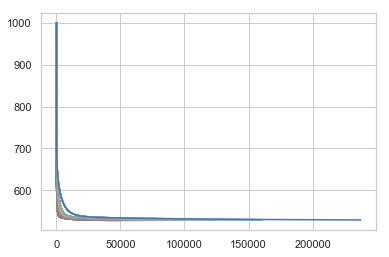

In [25]:
## Training the model with various alpha and threshold values to monitor the behvaior of cost function

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix

trainrmslist = []
testrmslist = []
graphplot=[]
testpredictionslist = []
trainpredictionslist = []
betavalues = []
cost = []
for alpha in range(11,0,-1):
    for threshold in range(11,0,-1):
        graph,beta,cost = gradient_descent(Xtrain,ytrain,alpha/10,threshold/100000)
        graphplot.append(graph)
        betavalues.append(beta)
        cost.append(cost)
        trainpredictions = np.dot(beta,np.transpose(Xtrain))
        trainpredictionslist.append(trainpredictions)
        testpredictions = np.dot(beta,np.transpose(Xtest))
        testpredictionslist.append(testpredictions)
        trainrms = sqrt(mean_squared_error(ytrain, trainpredictions))
        testrms = sqrt(mean_squared_error(ytest, testpredictions))
        trainrmslist.append(trainrms)
        testrmslist.append(testrms)

In [137]:
min(testrmslist) # minimum of test error

33.668149559972115

In [ ]:
testrmslist.index(min(testrmslist)) # the index of minimum test error

In [ ]:
min(trainrmslist) # # minimum of train error

In [138]:
trainrmslist.index(min(trainrmslist)) # the index of minimum train error

10

In [ ]:
betavalues[10] # beta values where the test and train error is minimum

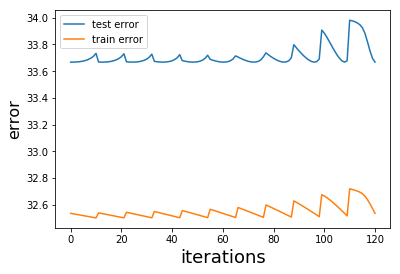

In [135]:
## plotting test and train error in the same graph w.r.t iterations by varying alpha and threshold values
plt.plot(testrmslist, label='test error')
plt.plot(trainrmslist, label='train error')
plt.xlabel('iterations', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.legend()

plt.show()

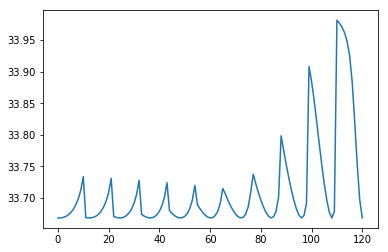

In [112]:
plt.plot(testrmslist)

We are at the iteration ===> 1000
568.7307338805232
0.008837343704385603
We are at the iteration ===> 2000
565.158678980925
0.0015621579609614855
We are at the iteration ===> 3000
563.9567427756051
0.0009908956943718294
We are at the iteration ===> 4000
563.0758972780204
0.0007883361677158973
We are at the iteration ===> 5000
562.360189338441
0.0006497637832580949
We are at the iteration ===> 6000
561.7663645647766
0.0005420527803607911
We are at the iteration ===> 7000
561.2693385575641
0.0004550054580931828
We are at the iteration ===> 8000
560.8513324033855
0.0003833199217524452
We are at the iteration ===> 9000
560.4987690772698
0.00032365227889386006
We are at the iteration ===> 10000
560.2008607368066
0.00027366954543595057
We are at the iteration ===> 11000
559.9488311497369
0.00023163385037605622
We are at the iteration ===> 12000
559.7354365525069
0.00019619261206571537
We are at the iteration ===> 13000
559.5546438488618
0.00016626219587578817
We are at the iteration ===> 140

We are at the iteration ===> 8000
531.5455974789037
0.0004075238972518491
We are at the iteration ===> 9000
531.162551875352
0.00035979890276394144
We are at the iteration ===> 10000
530.8239198226705
0.0003184639679147949
We are at the iteration ===> 11000
530.5239186882849
0.000282370840409385
We are at the iteration ===> 12000
530.2577465436442
0.0002506805024040659
We are at the iteration ===> 13000
530.0213359666561
0.0002227490259656406
We are at the iteration ===> 14000
529.8111937527333
0.0001980637345013747
We are at the iteration ===> 15000
529.6242903759045
0.0001762048823366058
We are at the iteration ===> 16000
529.4579800472706
0.00015682145487971866
We are at the iteration ===> 17000
529.3099404910498
0.00013961521824512602
We are at the iteration ===> 18000
529.1781259696414
0.0001243297678001909
We are at the iteration ===> 19000
529.0607295696659
0.00011074271935740398
We are at the iteration ===> 1000
543.8506554825844
0.017725748031239164
We are at the iteration ===

We are at the iteration ===> 13000
531.403040084181
0.00025046533551176253
We are at the iteration ===> 14000
531.1623304943683
0.00023127460190153215
We are at the iteration ===> 15000
530.9399462530348
0.00021377461803240294
We are at the iteration ===> 16000
530.7343034409937
0.00019775964642576582
We are at the iteration ===> 17000
530.54400308754
0.00018306330139239435
We are at the iteration ===> 18000
530.3677975410022
0.00016954787497525103
We are at the iteration ===> 19000
530.2045655800447
0.00015709721810708288
We are at the iteration ===> 20000
530.0532934692168
0.0001456118042142407
We are at the iteration ===> 21000
529.9130601951019
0.00013500520594789123
We are at the iteration ===> 22000
529.7830257179585
0.00012520152631623205
We are at the iteration ===> 23000
529.662421444208
0.0001161334863581942
We are at the iteration ===> 24000
529.5505423651011
0.00010774097802368487
We are at the iteration ===> 25000
529.4467404673003
9.996994924676983e-05
We are at the itera

We are at the iteration ===> 16000
532.6296483014871
0.00019701164933394466
We are at the iteration ===> 17000
532.4375181376164
0.00018738810558716068
We are at the iteration ===> 18000
532.2546446190678
0.00017847635388079652
We are at the iteration ===> 19000
532.080373081842
0.00017016842036809976
We are at the iteration ===> 20000
531.914140960207
0.00016238567695836537
We are at the iteration ===> 21000
531.7554543839145
0.00015506801867104514
We are at the iteration ===> 22000
531.603873011239
0.0001481677066976772
We are at the iteration ===> 23000
531.4589996530168
0.00014164569006425154
We are at the iteration ===> 24000
531.3204728277228
0.00013546929085350712
We are at the iteration ===> 25000
531.1879612018191
0.00012961067773176183
We are at the iteration ===> 26000
531.0611593013952
0.0001240458124129873
We are at the iteration ===> 27000
530.9397841181676
0.0001187536911402276
We are at the iteration ===> 28000
530.8235723679784
0.00011371578591479192
We are at the iter

We are at the iteration ===> 2000
609.2277407882139
0.01875479096224808
We are at the iteration ===> 3000
593.268663934702
0.013665109481962645
We are at the iteration ===> 4000
581.3499446107685
0.010359026027913387
We are at the iteration ===> 5000
572.2584870891916
0.007948154742393854
We are at the iteration ===> 6000
565.2490649965214
0.006160009259588151
We are at the iteration ===> 7000
559.7904637474691
0.00482219078696744
We are at the iteration ===> 8000
555.496730139615
0.0038128827330865533
We are at the iteration ===> 9000
552.0854657126483
0.0030447403759126246
We are at the iteration ===> 10000
549.3487105717849
0.002454822960544334
We are at the iteration ===> 11000
547.1322566855624
0.001997573946596276
We are at the iteration ===> 12000
545.3208902173066
0.0016398574377944897
We are at the iteration ===> 13000
543.8278329098059
0.0013574383276591107
We are at the iteration ===> 14000
542.5871637525321
0.0011324817014610744
We are at the iteration ===> 15000
541.548359

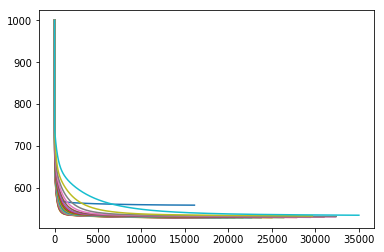

In [152]:
## Experimentation 1: training the model with varying alpha values by holding threshold as constant 0.00001

trainrmslist2 = []
testrmslist2 = []
graphplot2=[]
testpredictionslist2 = []
trainpredictionslist2 = []
betavalues2 = []
cost2 = []
for alpha in range(20,0,-1):
    graph,beta,cost = gradient_descent(Xtrain,ytrain,alpha/10,10/100000)
    graphplot2.append(graph)
    betavalues2.append(beta)
    cost2.append(cost)
    trainpredictions = np.dot(beta,np.transpose(Xtrain))
    trainpredictionslist2.append(trainpredictions)
    testpredictions = np.dot(beta,np.transpose(Xtest))
    testpredictionslist2.append(testpredictions)
    trainrms = sqrt(mean_squared_error(ytrain, trainpredictions))
    testrms = sqrt(mean_squared_error(ytest, testpredictions))
    trainrmslist2.append(trainrms)
    testrmslist2.append(testrms)

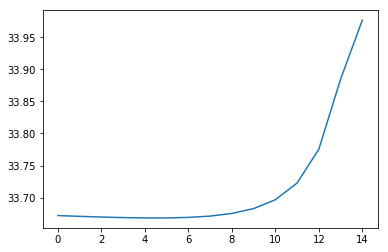

In [114]:
## plotting the test error
plt.plot(testrmslist2)

In [ ]:
## plotting the train error
plt.plot(trainrmslist2)

In [115]:
testrmslist2.index(min(testrmslist2)) 

4

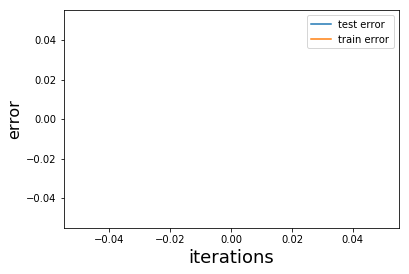

In [150]:
## plotting test and train error w.r.t varying alpha values
plt.plot(testrmslist2, label='test error')
plt.plot(trainrmslist2, label='train error')
plt.xlabel('iterations', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.legend()

plt.show()

In [117]:
trainrmslist2.index(min(trainrmslist2))

0

In [139]:
min(testrmslist2)

33.668149559972115

In [140]:
min(trainrmslist2)

32.52411298422836

In [141]:
trainrmslist2.index(min(trainrmslist2))

0

In [142]:
trainrmslist2.index(min(trainrmslist2))

0

In [149]:
betavalues[0]

array([  7.80322844, -27.31813434,  48.49325765, -71.3514097 ,
        40.12334852,  22.76656885, 187.05183831, -53.76901983,
       127.81187241, 546.34702377, 179.88680516,   3.98664829])

In [127]:
testmselist2 = []
for i in range(0,15,1):
    testmselist2.append(testrmslist2[i]**2)
testmselist2


[1133.7919592430578,
 1133.7097285574987,
 1133.63698461747,
 1133.5792092552433,
 1133.5442947926506,
 1133.5443316678704,
 1133.5983837578624,
 1133.7373958307464,
 1134.014528473853,
 1134.5252789429053,
 1135.456368636147,
 1137.2106821055932,
 1140.7709988350193,
 1148.1683558870561,
 1154.426765880016]

We are at the iteration ===> 1000
547.1611780102157
0.022065544866222808
We are at the iteration ===> 2000
537.5091184731646
0.00370764016213343
We are at the iteration ===> 3000
535.3653476960717
0.0012534100054608643
We are at the iteration ===> 4000
534.4221911004831
0.0007459020841906749
We are at the iteration ===> 5000
533.7675102623989
0.0005866652986696863
We are at the iteration ===> 6000
533.2248620909178
0.0005049003536896635
We are at the iteration ===> 7000
532.7501278369268
0.0004470844140769259
We are at the iteration ===> 8000
532.3271175534165
0.0004003761766853131
We are at the iteration ===> 9000
531.9471168179159
0.0003606364988399946
We are at the iteration ===> 10000
531.6041843738363
0.00032601215411887097
We are at the iteration ===> 11000
531.2937784797541
0.00029543873290549527
We are at the iteration ===> 12000
531.0122236299783
0.0002682081043303697
We are at the iteration ===> 13000
530.7564458059161
0.00024380826368997077
We are at the iteration ===> 14000

We are at the iteration ===> 15000
530.3120581032905
0.00020202261362101126
We are at the iteration ===> 16000
530.1191644604088
0.0001840777400730076
We are at the iteration ===> 17000
529.943362413225
0.00016780586645381845
We are at the iteration ===> 18000
529.7830698432845
0.00015303002987820946
We are at the iteration ===> 19000
529.6368687645814
0.00013959792045170616
We are at the iteration ===> 20000
529.5034833215223
0.00012737686211039545
We are at the iteration ===> 21000
529.3817620720894
0.00011625016941252397
We are at the iteration ===> 22000
529.2706634180316
0.0001061144359937316
We are at the iteration ===> 1000
547.1611780102157
0.022065544866222808
We are at the iteration ===> 2000
537.5091184731646
0.00370764016213343
We are at the iteration ===> 3000
535.3653476960717
0.0012534100054608643
We are at the iteration ===> 4000
534.4221911004831
0.0007459020841906749
We are at the iteration ===> 5000
533.7675102623989
0.0005866652986696863
We are at the iteration ===>

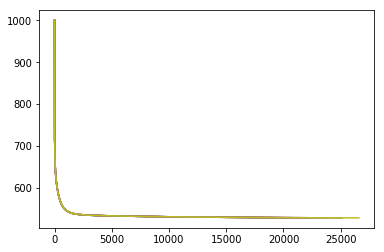

In [169]:
## Experimentation 2: Training the model by varying threshold and holding alpha constant as 1.1 
trainrmslist3 = []
testrmslist3 = []
graphplot3=[]
testpredictionslist3 = []
trainpredictionslist3 = []
betavalues3 = []
cost3 = []
for threshold in range(15,6,-1):
    graph,beta,cost = gradient_descent(Xtrain,ytrain,1.1,threshold/100000)
    graphplot3.append(graph)
    betavalues3.append(beta)
    cost3.append(cost)
    trainpredictions = np.dot(beta,np.transpose(Xtrain))
    trainpredictionslist3.append(trainpredictions)
    testpredictions = np.dot(beta,np.transpose(Xtest))
    testpredictionslist3.append(testpredictions)
    trainrms = sqrt(mean_squared_error(ytrain, trainpredictions))
    testrms = sqrt(mean_squared_error(ytest, testpredictions))
    trainrmslist3.append(trainrms)
    testrmslist3.append(testrms)

In [170]:
testrmslist3.index(min(testrmslist3))

5

In [172]:
min(testrmslist3)

33.668149559972115

In [167]:
trainrmslist3.index(min(trainrmslist3))

8

In [173]:
testrmslist3

[33.67345164644255,
 33.67144855915009,
 33.66986292722391,
 33.66874449331083,
 33.66814968430329,
 33.668149559972115,
 33.66883323496731,
 33.670315670659186,
 33.67274870451451]

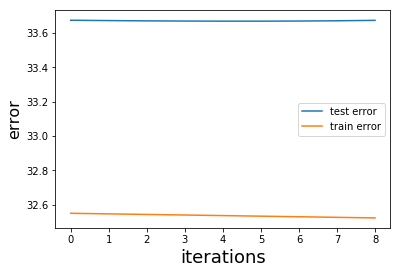

In [171]:
## plotting test and train error
plt.plot(testrmslist3, label='test error')
plt.plot(trainrmslist3, label='train error')
plt.xlabel('iterations', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.legend()
plt.show()

In [175]:
min(testrmslist3)

33.668149559972115

In [179]:
testrmslist3[5]

33.668149559972115

In [178]:
trainrmslist3[5]

32.53313680985653

In [177]:
betavalues3[5]

array([  7.80322844, -28.47124104,  48.86134667, -71.9046171 ,
        40.81440464,  20.82090589, 190.65409605, -56.6619778 ,
       122.13007199, 552.74030028, 184.94534109,   3.99276499])

In [162]:
min(testrmslist3)

33.73356128760855

In [158]:
testrmslist3.index(min(testrmslist3))

0

In [148]:
min(testrmslist3)

33.67313822099621

In [110]:
min(testrmslist)

33.668149559972115

We are at the iteration ===> 1000
547.1611780102157
0.022065544866222808
We are at the iteration ===> 2000
537.5091184731646
0.00370764016213343
We are at the iteration ===> 3000
535.3653476960717
0.0012534100054608643
We are at the iteration ===> 4000
534.4221911004831
0.0007459020841906749
We are at the iteration ===> 5000
533.7675102623989
0.0005866652986696863
We are at the iteration ===> 6000
533.2248620909178
0.0005049003536896635
We are at the iteration ===> 7000
532.7501278369268
0.0004470844140769259
We are at the iteration ===> 8000
532.3271175534165
0.0004003761766853131
We are at the iteration ===> 9000
531.9471168179159
0.0003606364988399946
We are at the iteration ===> 10000
531.6041843738363
0.00032601215411887097
We are at the iteration ===> 11000
531.2937784797541
0.00029543873290549527
We are at the iteration ===> 12000
531.0122236299783
0.0002682081043303697
We are at the iteration ===> 13000
530.7564458059161
0.00024380826368997077
We are at the iteration ===> 14000

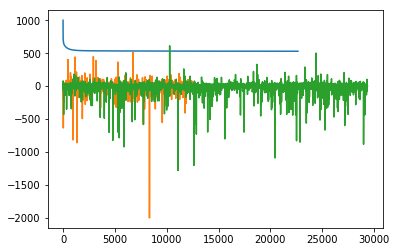

In [79]:
bestgraph,bestbeta,bestcost = gradient_descent(Xtrain,ytrain,1.1,1/10000)
testpredictions = np.dot(bestbeta,np.transpose(Xtest))
testerror = testpredictions - ytest
trainpredictions = np.dot(bestbeta,np.transpose(Xtrain))
trainerror = trainpredictions - ytrain
testrms = sqrt(mean_squared_error(ytest, testpredictions))
trainrms = sqrt(mean_squared_error(ytrain, trainpredictions))
print(testrms)
print(trainrms)
plt.plot(testerror)
plt.plot(trainerror)

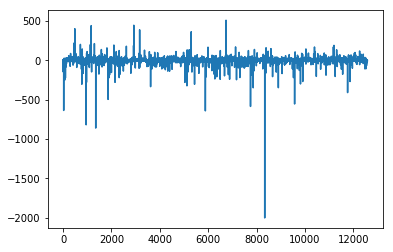

In [78]:
plt.plot(testerror)

In [75]:
bestpredictions.shape

(12585,)

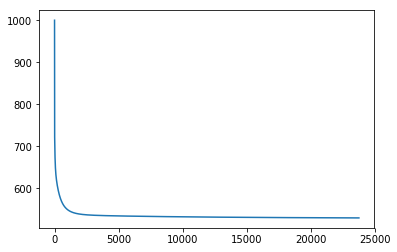

In [76]:
plt.plot(bestcost)

We are at the iteration ===> 1000
547.1611780102157
0.022065544866222808
We are at the iteration ===> 2000
537.5091184731646
0.00370764016213343
We are at the iteration ===> 3000
535.3653476960717
0.0012534100054608643
We are at the iteration ===> 4000
534.4221911004831
0.0007459020841906749
We are at the iteration ===> 5000
533.7675102623989
0.0005866652986696863
We are at the iteration ===> 6000
533.2248620909178
0.0005049003536896635
We are at the iteration ===> 7000
532.7501278369268
0.0004470844140769259
We are at the iteration ===> 8000
532.3271175534165
0.0004003761766853131
We are at the iteration ===> 9000
531.9471168179159
0.0003606364988399946
We are at the iteration ===> 10000
531.6041843738363
0.00032601215411887097
We are at the iteration ===> 11000
531.2937784797541
0.00029543873290549527
We are at the iteration ===> 12000
531.0122236299783
0.0002682081043303697
We are at the iteration ===> 13000
530.7564458059161
0.00024380826368997077
We are at the iteration ===> 14000

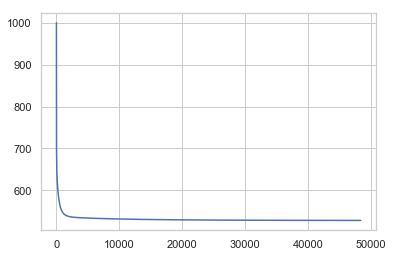

In [24]:
## Running the function with best alpha and threshold values
bestgraph,bestbeta,bestcost_history = gradient_descent(Xtrain,ytrain,1.1,0.00001)

In [87]:
X_train.head

<bound method NDFrame.head of        page_mentions  derived_5  derived_25  derived_13  derived_18  \
36848       0.004891  -0.057903   -0.035533   -0.023144   -0.022497   
25895      -0.005929  -0.005590   -0.023992   -0.016265   -0.019231   
22739       0.009384  -0.004680   -0.015031   -0.009204   -0.015941   
22481      -0.007533  -0.065045   -0.042072   -0.025828   -0.026484   
31049      -0.007200  -0.063182   -0.040277   -0.025657   -0.025775   
17902      -0.006933   0.009339    0.010471   -0.015619   -0.013308   
29536       0.015878   0.117752    0.084645    0.052469    0.053389   
19914       0.003299   0.140517    0.088132    0.033557    0.027590   
2884       -0.004688  -0.025481   -0.018099   -0.006085   -0.009940   
22991      -0.007180  -0.062206   -0.040712   -0.026815   -0.026715   
29623       0.015878   0.117752    0.084645    0.052469    0.053389   
878        -0.007530  -0.066172   -0.041840   -0.027691   -0.027338   
40435       0.007423   0.092742    0.073922    

In [89]:
## Experimentation 3 : Defining a new dataset with random 5 features
randomX_train = X_train[['page_mentions', 'derived_5', 'derived_25', 'derived_13', 'H_hours']]
randomX_test = X_test[['page_mentions', 'derived_5', 'derived_25', 'derived_13', 'H_hours']]
randomX_test.shape
randomX_train.shape

(29364, 5)

In [90]:
#Normalizing feature set
randomXtrain = pd.DataFrame(normalize(randomX_train))
randomXtest = pd.DataFrame(normalize(randomX_test))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
## adding a column of ones to features set
one_column3 = np.ones((randomXtrain.shape[0],1))
randomXtrain = np.concatenate((one_column, randomXtrain), axis = 1)
one_column4 = np.ones((randomXtest.shape[0],1))
randomXtest = np.concatenate((one_column2, randomXtest), axis = 1)
randomXtest.shape

(12585, 6)

We are at the iteration ===> 1000
674.5515171732113
0.0004174305332753647
We are at the iteration ===> 1000
674.5515171732113
0.0004174305332753647
We are at the iteration ===> 1000
674.5515171732113
0.0004174305332753647
We are at the iteration ===> 2000
674.3063555077174
0.00013091484481719817
We are at the iteration ===> 1000
674.5515171732113
0.0004174305332753647
We are at the iteration ===> 2000
674.3063555077174
0.00013091484481719817
We are at the iteration ===> 1000
674.5515171732113
0.0004174305332753647
We are at the iteration ===> 2000
674.3063555077174
0.00013091484481719817
We are at the iteration ===> 1000
674.5515171732113
0.0004174305332753647
We are at the iteration ===> 2000
674.3063555077174
0.00013091484481719817
We are at the iteration ===> 1000
674.5515171732113
0.0004174305332753647
We are at the iteration ===> 2000
674.3063555077174
0.00013091484481719817
We are at the iteration ===> 1000
674.5515171732113
0.0004174305332753647
We are at the iteration ===> 2000

We are at the iteration ===> 1000
674.7657799841036
0.00040699374972064106
We are at the iteration ===> 2000
674.4771015059068
0.00019701811459071905
We are at the iteration ===> 1000
674.7657799841036
0.00040699374972064106
We are at the iteration ===> 2000
674.4771015059068
0.00019701811459071905
We are at the iteration ===> 1000
674.7657799841036
0.00040699374972064106
We are at the iteration ===> 2000
674.4771015059068
0.00019701811459071905
We are at the iteration ===> 1000
674.7657799841036
0.00040699374972064106
We are at the iteration ===> 2000
674.4771015059068
0.00019701811459071905
We are at the iteration ===> 1000
674.7657799841036
0.00040699374972064106
We are at the iteration ===> 2000
674.4771015059068
0.00019701811459071905
We are at the iteration ===> 1000
674.7657799841036
0.00040699374972064106
We are at the iteration ===> 2000
674.4771015059068
0.00019701811459071905
We are at the iteration ===> 3000
674.3355878514842
9.822906577028334e-05
We are at the iteration ==

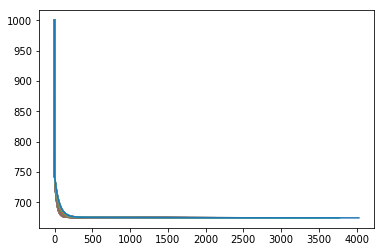

In [182]:
## Experimentation 3 : Training the model with varying alpha and threshold values with random 5 features
randomtrainrmslist = []
randomtestrmslist = []
randomgraphplot=[]
randomtestpredictionslist = []
randomtrainpredictionslist = []
randombetavalues = []
randomcost = []
for alpha in range(15,6,-1):
    for threshold in range(15,6,-1):
        graph,beta,cost = gradient_descent(randomXtrain,ytrain,alpha/10,threshold/100000)
        randomgraphplot.append(graph)
        randombetavalues.append(beta)
        randomcost.append(cost)
        trainpredictions = np.dot(beta,np.transpose(randomXtrain))
        randomtrainpredictionslist.append(trainpredictions)
        testpredictions = np.dot(beta,np.transpose(randomXtest))
        randomtestpredictionslist.append(testpredictions)
        trainrms = sqrt(mean_squared_error(ytrain, trainpredictions))
        testrms = sqrt(mean_squared_error(ytest, testpredictions))
        randomtrainrmslist.append(trainrms)
        randomtestrmslist.append(testrms)

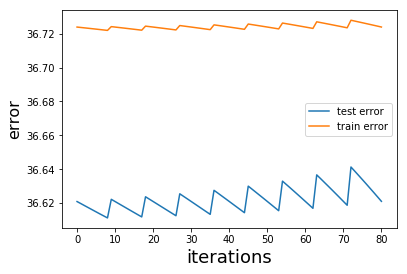

In [183]:
plt.plot(randomtestrmslist, label='test error')
plt.plot(randomtrainrmslist, label='train error')
plt.xlabel('iterations', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.legend()
plt.show()

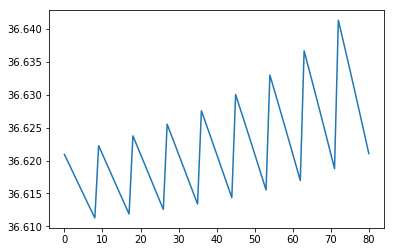

In [184]:
plt.plot(randomtestrmslist)

In [185]:
min(randomtestrmslist)

36.61128685764466

In [188]:
min(randomtrainrmslist)

36.721915629187684

In [190]:
randombetavalues[8]

array([ 7.80322844, 13.28107212, 43.98939924, 77.22845312, 82.61821955,
        3.86384727])

In [186]:
randomtestrmslist.index(min(randomtestrmslist))

8

In [187]:
randomtrainrmslist.index(min(randomtrainrmslist))

8

In [94]:
## Experimentation 4: defining a new dataset with top 5 picked features
topX_train = X_train[['comments_24_post', 'comments_diff', 'comments_counts_24', 'post_share_count', 'H_hours']]
topX_train.shape

(29364, 5)

In [95]:
topX_test = X_test[['comments_24_post', 'comments_diff', 'comments_counts_24', 'post_share_count', 'H_hours']]
topX_test.shape

(12585, 5)

In [101]:
topXtrain = pd.DataFrame(normalize(topX_train))
topXtest = pd.DataFrame(normalize(topX_test))


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
topXtrain.head

<bound method NDFrame.head of        comments_24_post  comments_diff  comments_counts_24  post_share_count  \
36848         -0.018478      -0.000872           -0.008039         -0.000409   
25895         -0.017041      -0.000872           -0.008398         -0.000733   
22739         -0.015603      -0.001113           -0.008398         -0.000795   
22481         -0.019197      -0.000872           -0.008398         -0.000816   
31049         -0.018478      -0.001354           -0.008398         -0.000740   
17902         -0.019197      -0.000872           -0.008398         -0.000816   
29536          0.054824      -0.011482            0.020707          0.000206   
19914         -0.019197      -0.000872           -0.008398         -0.000671   
2884          -0.005902      -0.005694           -0.003727          0.000061   
22991         -0.018837      -0.000631           -0.008039         -0.000699   
29623          0.119503       0.092208            0.130301          0.000889   
878       

In [103]:
one_column5 = np.ones((topXtrain.shape[0],1))
topXtrain = np.concatenate((one_column5, topXtrain), axis = 1)
one_column6 = np.ones((topXtest.shape[0],1))
topXtest = np.concatenate((one_column6, topXtest), axis = 1)


In [104]:
topXtest.shape

(12585, 6)

We are at the iteration ===> 1000
551.9123332600421
0.012393553581546257
We are at the iteration ===> 2000
546.930081162783
0.0016509174755583444
We are at the iteration ===> 3000
545.9368930945093
0.0006723522376432811
We are at the iteration ===> 4000
545.3544285065994
0.0005231087922084043
We are at the iteration ===> 5000
544.8681566362704
0.0004533723375743648
We are at the iteration ===> 6000
544.44345898504
0.0003975049562541244
We are at the iteration ===> 7000
544.0707835844331
0.0003489739888209442
We are at the iteration ===> 8000
543.7435570691389
0.00030645240042304067
We are at the iteration ===> 9000
543.4561775384794
0.00026915800413007673
We are at the iteration ===> 10000
543.2037517132042
0.00023643942381568195
We are at the iteration ===> 11000
542.9819938903971
0.000207729747785379
We are at the iteration ===> 12000
542.787148796902
0.00018253325140449306
We are at the iteration ===> 13000
542.6159251737168
0.0001604161647037472
We are at the iteration ===> 1000
55

We are at the iteration ===> 8000
543.7435570691389
0.00030645240042304067
We are at the iteration ===> 9000
543.4561775384794
0.00026915800413007673
We are at the iteration ===> 10000
543.2037517132042
0.00023643942381568195
We are at the iteration ===> 11000
542.9819938903971
0.000207729747785379
We are at the iteration ===> 12000
542.787148796902
0.00018253325140449306
We are at the iteration ===> 13000
542.6159251737168
0.0001604161647037472
We are at the iteration ===> 14000
542.465437843708
0.00014099882230311778
We are at the iteration ===> 15000
542.3331571010323
0.00012394883844990545
We are at the iteration ===> 16000
542.2168644798687
0.00010897515176111483
We are at the iteration ===> 17000
542.1146140880016
9.582283234976785e-05
We are at the iteration ===> 18000
542.02469879659
8.426854674326023e-05
We are at the iteration ===> 1000
551.9123332600421
0.012393553581546257
We are at the iteration ===> 2000
546.930081162783
0.0016509174755583444
We are at the iteration ===> 

We are at the iteration ===> 9000
543.6240787419412
0.0002715437564120293
We are at the iteration ===> 10000
543.3683460272813
0.00024058301448803832
We are at the iteration ===> 11000
543.1417562005792
0.0002131811965000452
We are at the iteration ===> 12000
542.9409613636385
0.00018892528782998852
We are at the iteration ===> 13000
542.7630018285749
0.00016745078210078645
We are at the iteration ===> 14000
542.6052606010327
0.00014843585563539818
We are at the iteration ===> 15000
542.4654232868538
0.000131596304413506
We are at the iteration ===> 16000
542.3414427459772
0.0001166810961876763
We are at the iteration ===> 17000
542.2315079222166
0.0001034684544265474
We are at the iteration ===> 1000
552.8075760468223
0.013632463790600013
We are at the iteration ===> 2000
547.174534966921
0.0019054959880122624
We are at the iteration ===> 3000
546.0777143829117
0.0006919588421396838
We are at the iteration ===> 4000
545.4970667733069
0.0005115531974979604
We are at the iteration ===> 

We are at the iteration ===> 2000
547.4802377149898
0.002235090237377335
We are at the iteration ===> 3000
546.2354715838501
0.0007320218671793555
We are at the iteration ===> 4000
545.6471864463231
0.0005026060338195748
We are at the iteration ===> 5000
545.1844054222181
0.00043078669887108845
We are at the iteration ===> 6000
544.7785767844281
0.0003825994438102498
We are at the iteration ===> 7000
544.4169806051538
0.0003415059605913484
We are at the iteration ===> 8000
544.0940648504803
0.0003050642418429561
We are at the iteration ===> 9000
543.8055731023251
0.00027256873318037833
We are at the iteration ===> 10000
543.5477942309041
0.00024356696064842254
We are at the iteration ===> 11000
543.3174297932876
0.0002176771257609289
We are at the iteration ===> 12000
543.111540054859
0.00019456180598353967
We are at the iteration ===> 13000
542.9275036442482
0.00017392082406786358
We are at the iteration ===> 14000
542.7629825957155
0.00015548685814792407
We are at the iteration ===> 

We are at the iteration ===> 4000
545.8072957199322
0.0004994880425783776
We are at the iteration ===> 5000
545.3542363121561
0.00041845797511541605
We are at the iteration ===> 6000
544.9598809650181
0.0003725581112803411
We are at the iteration ===> 7000
544.6065257177703
0.0003350525670384741
We are at the iteration ===> 8000
544.288407083106
0.0003018289780811756
We are at the iteration ===> 9000
544.0017728354576
0.00027199561520774296
We are at the iteration ===> 10000
543.7434504110676
0.00024514608185199904
We are at the iteration ===> 11000
543.5106151249315
0.00022097092789863382
We are at the iteration ===> 12000
543.3007304248886
0.00019920001841455814
We are at the iteration ===> 13000
543.111515161072
0.00017959177660031855
We are at the iteration ===> 14000
542.9409171619551
0.00016192930104352854
We are at the iteration ===> 1000
555.1259484630258
0.016567764461569823
We are at the iteration ===> 2000
547.8702981935206
0.002655896191413376
We are at the iteration ===> 3

We are at the iteration ===> 18000
542.4104303872437
0.00010712322659856
We are at the iteration ===> 19000
542.3086489997925
9.663169862506038e-05
We are at the iteration ===> 1000
555.1259484630258
0.016567764461569823
We are at the iteration ===> 2000
547.8702981935206
0.002655896191413376
We are at the iteration ===> 3000
546.4189644861168
0.0008027998771922285
We are at the iteration ===> 4000
545.8072957199322
0.0004994880425783776
We are at the iteration ===> 5000
545.3542363121561
0.00041845797511541605
We are at the iteration ===> 6000
544.9598809650181
0.0003725581112803411
We are at the iteration ===> 7000
544.6065257177703
0.0003350525670384741
We are at the iteration ===> 8000
544.288407083106
0.0003018289780811756
We are at the iteration ===> 9000
544.0017728354576
0.00027199561520774296
We are at the iteration ===> 10000
543.7434504110676
0.00024514608185199904
We are at the iteration ===> 11000
543.5106151249315
0.00022097092789863382
We are at the iteration ===> 12000


We are at the iteration ===> 4000
545.9820580348203
0.0005077531533288493
We are at the iteration ===> 5000
545.5336372445802
0.0004071528516078615
We are at the iteration ===> 6000
545.1513084918985
0.0003610036642385239
We are at the iteration ===> 7000
544.8080274747483
0.00032659575811067043
We are at the iteration ===> 8000
544.4967250072273
0.00029659596100373165
We are at the iteration ===> 9000
544.2138839456206
0.00026955973248732334
We are at the iteration ===> 10000
543.9567938906273
0.0002450402845397548
We are at the iteration ===> 11000
543.7230755875571
0.00022277571031281695
We are at the iteration ===> 12000
543.5105835524325
0.0002025523714337396
We are at the iteration ===> 13000
543.3173731623198
0.00018418057652525022
We are at the iteration ===> 14000
543.1416800239734
0.0001674890371532456
We are at the iteration ===> 15000
542.9819028162256
0.00015232258181185898
We are at the iteration ===> 16000
542.8365880083586
0.00013854054122930393
We are at the iteration 

We are at the iteration ===> 13000
543.547697620416
0.00018734721095370332
We are at the iteration ===> 14000
543.3682293504284
0.0001718304879432253
We are at the iteration ===> 15000
543.2036196186043
0.00015760979101742123
We are at the iteration ===> 1000
558.4864668737592
0.020495059867016607
We are at the iteration ===> 2000
549.0446281620606
0.00384297017683366
We are at the iteration ===> 3000
546.9293961656853
0.0010997449073784082
We are at the iteration ===> 4000
546.1802728161232
0.0005367682599626278
We are at the iteration ===> 5000
545.7255913768576
0.0004000033600277675
We are at the iteration ===> 6000
545.354108188942
0.0003486988365466459
We are at the iteration ===> 7000
545.0224209086695
0.00031614786996669864
We are at the iteration ===> 8000
544.7200758729083
0.00028915207155932876
We are at the iteration ===> 9000
544.4432199356331
0.00026497398278024775
We are at the iteration ===> 10000
544.1894423601921
0.00024293213527926127
We are at the iteration ===> 1100

We are at the iteration ===> 18000
542.787050704586
0.00012167646900707041
We are at the iteration ===> 19000
542.6704721629587
0.00011163599322117079
We are at the iteration ===> 20000
542.5635100828135
0.00010243050849112478
We are at the iteration ===> 21000
542.4653650619306
9.398994245657377e-05
We are at the iteration ===> 1000
558.4864668737592
0.020495059867016607
We are at the iteration ===> 2000
549.0446281620606
0.00384297017683366
We are at the iteration ===> 3000
546.9293961656853
0.0010997449073784082
We are at the iteration ===> 4000
546.1802728161232
0.0005367682599626278
We are at the iteration ===> 5000
545.7255913768576
0.0004000033600277675
We are at the iteration ===> 6000
545.354108188942
0.0003486988365466459
We are at the iteration ===> 7000
545.0224209086695
0.00031614786996669864
We are at the iteration ===> 8000
544.7200758729083
0.00028915207155932876
We are at the iteration ===> 9000
544.4432199356331
0.00026497398278024775
We are at the iteration ===> 1000

We are at the iteration ===> 13000
543.805426617746
0.000188685130410704
We are at the iteration ===> 14000
543.6239112254257
0.0001745451551187216
We are at the iteration ===> 15000
543.4559936430408
0.00016147423298207286
We are at the iteration ===> 16000
543.300646317867
0.0001493905807592455
We are at the iteration ===> 17000
543.1569201980208
0.0001382188555680841
We are at the iteration ===> 18000
543.023938608723
0.00012788955382347922
We are at the iteration ===> 1000
560.7750632848081
0.02310832835837573
We are at the iteration ===> 2000
549.9366905967205
0.004647311193025416
We are at the iteration ===> 3000
547.3176319150193
0.001372090762629341
We are at the iteration ===> 4000
546.4186812467854
0.0006019348105610334
We are at the iteration ===> 5000
545.9364404708662
0.00040331708407848055
We are at the iteration ===> 6000
545.5707641975167
0.0003376909121470817
We are at the iteration ===> 7000
545.251081560458
0.0003041555877416613
We are at the iteration ===> 8000
544.

We are at the iteration ===> 20000
542.78703108717
0.00010950659657282813
We are at the iteration ===> 21000
542.6816655338876
0.0001013390887010246
We are at the iteration ===> 22000
542.5841561535752
9.378556023875717e-05
We are at the iteration ===> 23000
542.4939125897986
8.679943130118772e-05
We are at the iteration ===> 24000
542.4103892545298
8.033769324811146e-05
We are at the iteration ===> 25000
542.333081897654
7.436063151544658e-05
We are at the iteration ===> 1000
563.6798903393247
0.026413820761604256
We are at the iteration ===> 2000
551.1431850330405
0.005621060627163388
We are at the iteration ===> 3000
547.8692223348838
0.001768951908843519
We are at the iteration ===> 4000
546.7292791747911
0.0007277656330870741
We are at the iteration ===> 5000
546.1801069091655
0.0004293621907436318
We are at the iteration ===> 6000
545.8070057721633
0.00033294963532171096
We are at the iteration ===> 7000
545.4966671873987
0.0002922736427990458
We are at the iteration ===> 8000
54

We are at the iteration ===> 15000
543.7433082098278
0.00016341664399988076
We are at the iteration ===> 16000
543.5854257057683
0.0001524866121371815
We are at the iteration ===> 17000
543.4380997429755
0.00014229412147415132
We are at the iteration ===> 18000
543.3006182832355
0.00013278883261591545
We are at the iteration ===> 19000
543.1723178362606
0.00012392393091431586
We are at the iteration ===> 20000
543.0525800840861
0.00011565584054551437
We are at the iteration ===> 21000
542.9408287633776
0.00010794398826874385
We are at the iteration ===> 22000
542.8365267710907
0.00010075058992242703
We are at the iteration ===> 1000
563.6798903393247
0.026413820761604256
We are at the iteration ===> 2000
551.1431850330405
0.005621060627163388
We are at the iteration ===> 3000
547.8692223348838
0.001768951908843519
We are at the iteration ===> 4000
546.7292791747911
0.0007277656330870741
We are at the iteration ===> 5000
546.1801069091655
0.0004293621907436318
We are at the iteration ==

We are at the iteration ===> 12000
544.6062721372449
0.00019542560573881929
We are at the iteration ===> 13000
544.4166965732189
0.00018386342992471327
We are at the iteration ===> 14000
544.2383181082037
0.00017301776563272142
We are at the iteration ===> 15000
544.0704537351422
0.0001628260768029577
We are at the iteration ===> 16000
543.9124730856519
0.00015324286766826845
We are at the iteration ===> 17000
543.7637873468135
0.00014422962749449653
We are at the iteration ===> 1000
567.4766574366987
0.03069051487022989
We are at the iteration ===> 2000
552.7979511934849
0.006799983165819867
We are at the iteration ===> 3000
548.6856784670573
0.002329264175955359
We are at the iteration ===> 4000
547.1733755492914
0.0009515307767742343
We are at the iteration ===> 5000
546.4876446663324
0.0005011081447037213
We are at the iteration ===> 6000
546.0771587543353
0.00034585753951432707
We are at the iteration ===> 7000
545.7657516379561
0.00028536556362723786
We are at the iteration ===> 

We are at the iteration ===> 23000
543.0381621032643
0.00010032738327936386
We are at the iteration ===> 24000
542.940806664731
9.44490474239501e-05
We are at the iteration ===> 1000
567.4766574366987
0.03069051487022989
We are at the iteration ===> 2000
552.7979511934849
0.006799983165819867
We are at the iteration ===> 3000
548.6856784670573
0.002329264175955359
We are at the iteration ===> 4000
547.1733755492914
0.0009515307767742343
We are at the iteration ===> 5000
546.4876446663324
0.0005011081447037213
We are at the iteration ===> 6000
546.0771587543353
0.00034585753951432707
We are at the iteration ===> 7000
545.7657516379561
0.00028536556362723786
We are at the iteration ===> 8000
545.4966005943274
0.00025573324467131897
We are at the iteration ===> 9000
545.250957094877
0.00023655468282868242
We are at the iteration ===> 10000
545.0222464276748
0.00022128860484826873
We are at the iteration ===> 11000
544.8078101860023
0.00020781509670086962
We are at the iteration ===> 12000

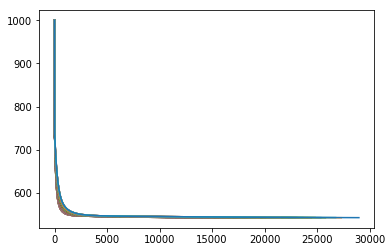

In [191]:
## Experimentation 4: Training the model for various alpha and threshold values for top 5 features
toptrainrmslist = []
toptestrmslist = []
topgraphplot=[]
toptestpredictionslist = []
toptrainpredictionslist = []
topbetavalues = []
topcost = []
for alpha in range(15,6,-1):
    for threshold in range(15,6,-1):
        graph,beta,cost = gradient_descent(topXtrain,ytrain,alpha/10,threshold/100000)
        topgraphplot.append(graph)
        topbetavalues.append(beta)
        topcost.append(cost)
        trainpredictions = np.dot(beta,np.transpose(topXtrain))
        toptrainpredictionslist.append(trainpredictions)
        testpredictions = np.dot(beta,np.transpose(topXtest))
        toptestpredictionslist.append(testpredictions)
        trainrms = sqrt(mean_squared_error(ytrain, trainpredictions))
        testrms = sqrt(mean_squared_error(ytest, testpredictions))
        toptrainrmslist.append(trainrms)
        toptestrmslist.append(testrms)

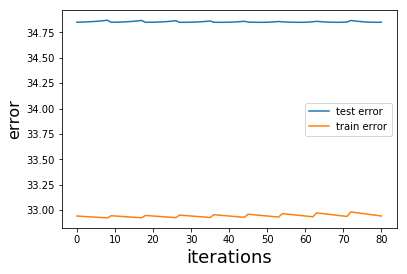

In [192]:
plt.plot(toptestrmslist, label='test error')
plt.plot(toptrainrmslist, label='train error')
plt.xlabel('iterations', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.legend()
plt.show()

In [195]:
min(toptestrmslist)

34.84968365410827

In [196]:
min(toptrainrmslist)

32.921506502041076

In [194]:
toptestrmslist.index(min(toptestrmslist))

48

In [197]:
topbetavalues[48]

array([7.80322844e+00, 4.09550429e+01, 1.58830642e+02, 5.23272664e+02,
       1.46607309e+02, 3.72353020e-01])

We are at the iteration ===> 1000
556.6408995397039
0.018363604076739648
We are at the iteration ===> 2000
548.3768299365881
0.0031856356579282874
We are at the iteration ===> 3000
546.6425041985268
0.0009187541423898438
We are at the iteration ===> 4000
545.9820580348203
0.0005077531533288493
We are at the iteration ===> 5000
545.5336372445802
0.0004071528516078615
We are at the iteration ===> 6000
545.1513084918985
0.0003610036642385239
We are at the iteration ===> 7000
544.8080274747483
0.00032659575811067043
We are at the iteration ===> 8000
544.4967250072273
0.00029659596100373165
We are at the iteration ===> 9000
544.2138839456206
0.00026955973248732334
We are at the iteration ===> 10000
543.9567938906273
0.0002450402845397548
We are at the iteration ===> 11000
543.7230755875571
0.00022277571031281695
We are at the iteration ===> 12000
543.5105835524325
0.0002025523714337396
We are at the iteration ===> 13000
543.3173731623198
0.00018418057652525022
We are at the iteration ===> 1

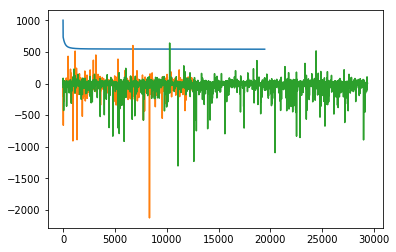

In [105]:
## Running the model for the best alpha and threshold values
topgraph,topbeta,topcost = gradient_descent(topXtrain,ytrain,1.1,1/10000)
toptestpredictions = np.dot(topbeta,np.transpose(topXtest))
toptesterror = toptestpredictions - ytest
toptrainpredictions = np.dot(topbeta,np.transpose(topXtrain))
toptrainerror = toptrainpredictions - ytrain
toptestrms = sqrt(mean_squared_error(ytest, toptestpredictions))
toptrainrms = sqrt(mean_squared_error(ytrain, toptrainpredictions))
print(toptestrms)
print(toptrainrms)
plt.plot(toptesterror)
plt.plot(toptrainerror)
